In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

# CCL

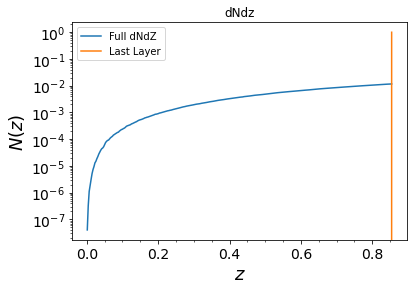

In [57]:
import pyccl as ccl

cosmo = ccl.Cosmology(Omega_c = 0.262, Omega_b = 0.048, h = 0.69, sigma8 = 0.83, n_s = 0.96)

#z = np.linspace(0., 1, 101)
#i_lim = 26. # Limiting i-band magnitude
#z0 = 0.0417*i_lim - 0.744

#Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
#pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
#dNdz = Ngal * pz # Number density distribution
#dNdz = np.zeros(z.shape)
#dNdz[z==0.89] = 1


z=np.loadtxt("MAPS/redshifts2048")
dNdz = np.loadtxt("MAPS/dNdz2048")
dNdzLayer = np.zeros(z.shape)
dNdzLayer[-1] = 1
b = 1*np.ones(len(dNdz)) #Galaxy bias (constant with scale and z)

plt.xlabel('$z$',fontsize=18)
plt.ylabel('$N(z)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(z, dNdz)
plt.plot(z, dNdzLayer)
plt.legend(["Full dNdZ", "Last Layer"])
plt.minorticks_on()
plt.title("dNdz")
plt.yscale("Log")
plt.show()

In [4]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz)) #CCL automatically normalizes dNdz
clu1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdz), bias=(z,b))
cluLayer = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdzLayer), bias=(z,b))
lensLayer = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdzLayer))

In [5]:
bias_ia = 1*np.ones_like(z) #A_IA=1 in the NLA model
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz = (z,dNdz), ia_bias = (z,bias_ia))

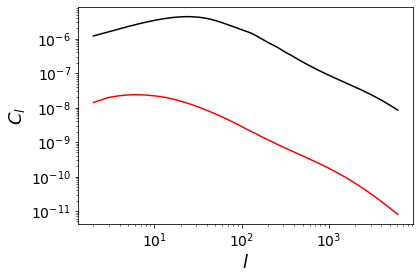

In [6]:
ell = np.arange(2, 6144)

cls = ccl.angular_cl(cosmo, lens1, lens1, ell) #Cosmic shear
cls_Layer = ccl.angular_cl(cosmo, lensLayer, lensLayer, ell) #Cosmic shear
cls_ia = ccl.angular_cl(cosmo, lens1_ia, lens1_ia, ell) #Cosmic shear with IA
cls_clu = ccl.angular_cl(cosmo, clu1, clu1, ell) #Clustering
cls_clu_Layer = ccl.angular_cl(cosmo, cluLayer, cluLayer, ell)

plt.xlabel('$l$',fontsize=18)
plt.ylabel('$C_l$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.plot(ell, cls_clu, 'k-')
plt.plot(ell, cls_ia, 'r-')
plt.show()

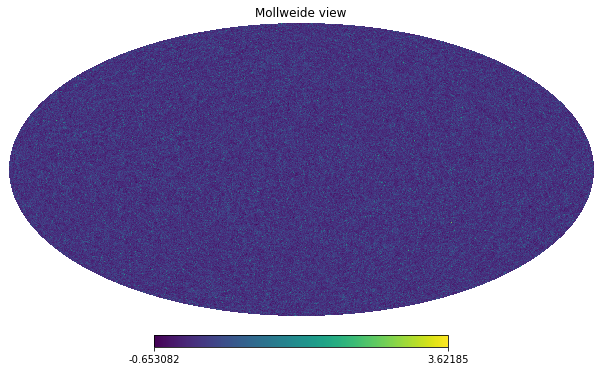

In [7]:
overdensity2048 = hp.read_map("MAPS/overdensity_NS_2048_R_2048_P_2048_DV_256.fits")
overdensity2560 = hp.read_map("MAPS/overdensity_NS_2048_R_2048_P_2560_DV_256.fits")
hp.mollview(overdensity2048,xsize=6400)

## One Layer

In [8]:
layer = hp.read_map("MAPS/layerOverdensity_NS_2048_R_2048_P_2048_DV_256.fits")
layerOver = layer/np.mean(layer)-1
psOverLayer = hp.sphtfunc.anafast(layerOver)

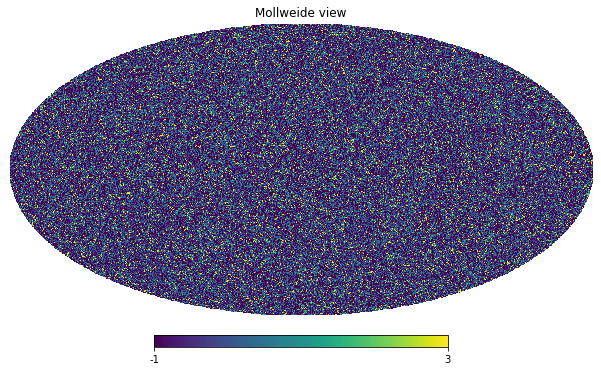

In [9]:
hp.mollview(layerOver,max = 3)

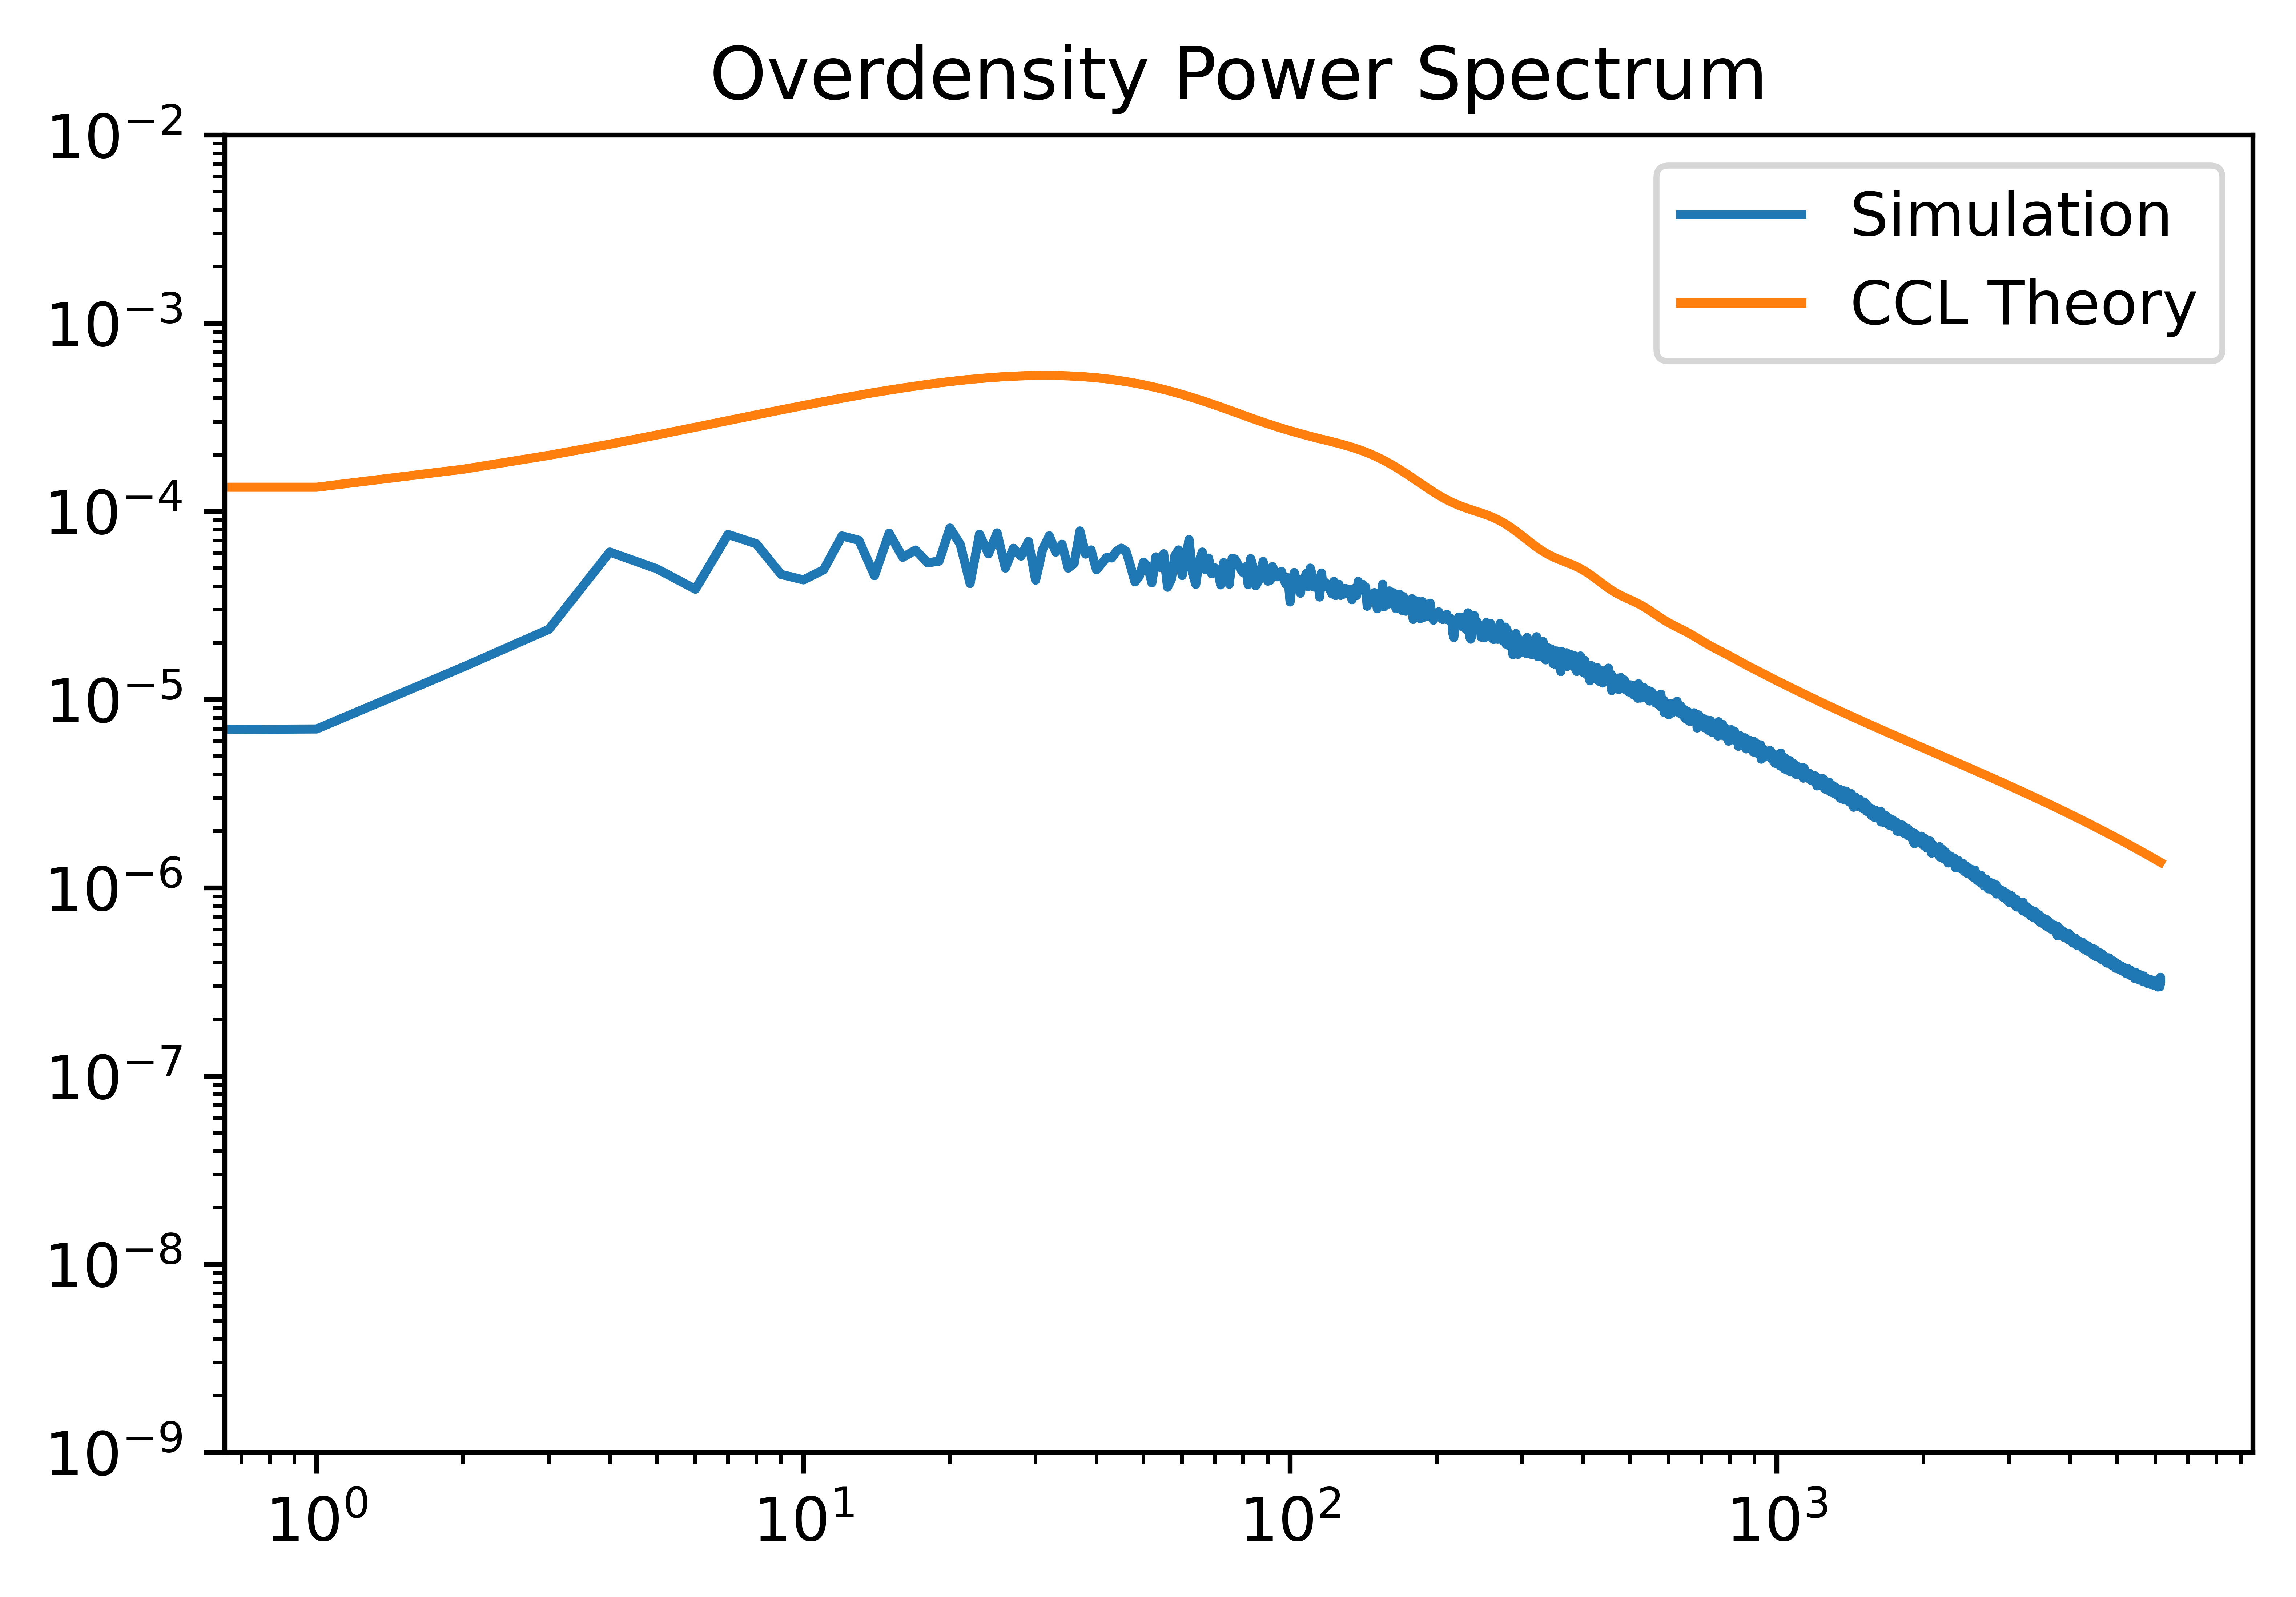

In [10]:
plt.figure(dpi=1200)
plt.loglog(psOverLayer);
plt.loglog(cls_clu_Layer);
plt.legend(loc=0, labels=["Simulation","CCL Theory"])
plt.title("Overdensity Power Spectrum")
plt.ylim(10**-9,10**-2)
plt.show()

## All Layers

In [11]:
psOver2048 = hp.sphtfunc.anafast(overdensity2048)
psOver2560 = hp.sphtfunc.anafast(overdensity2560)

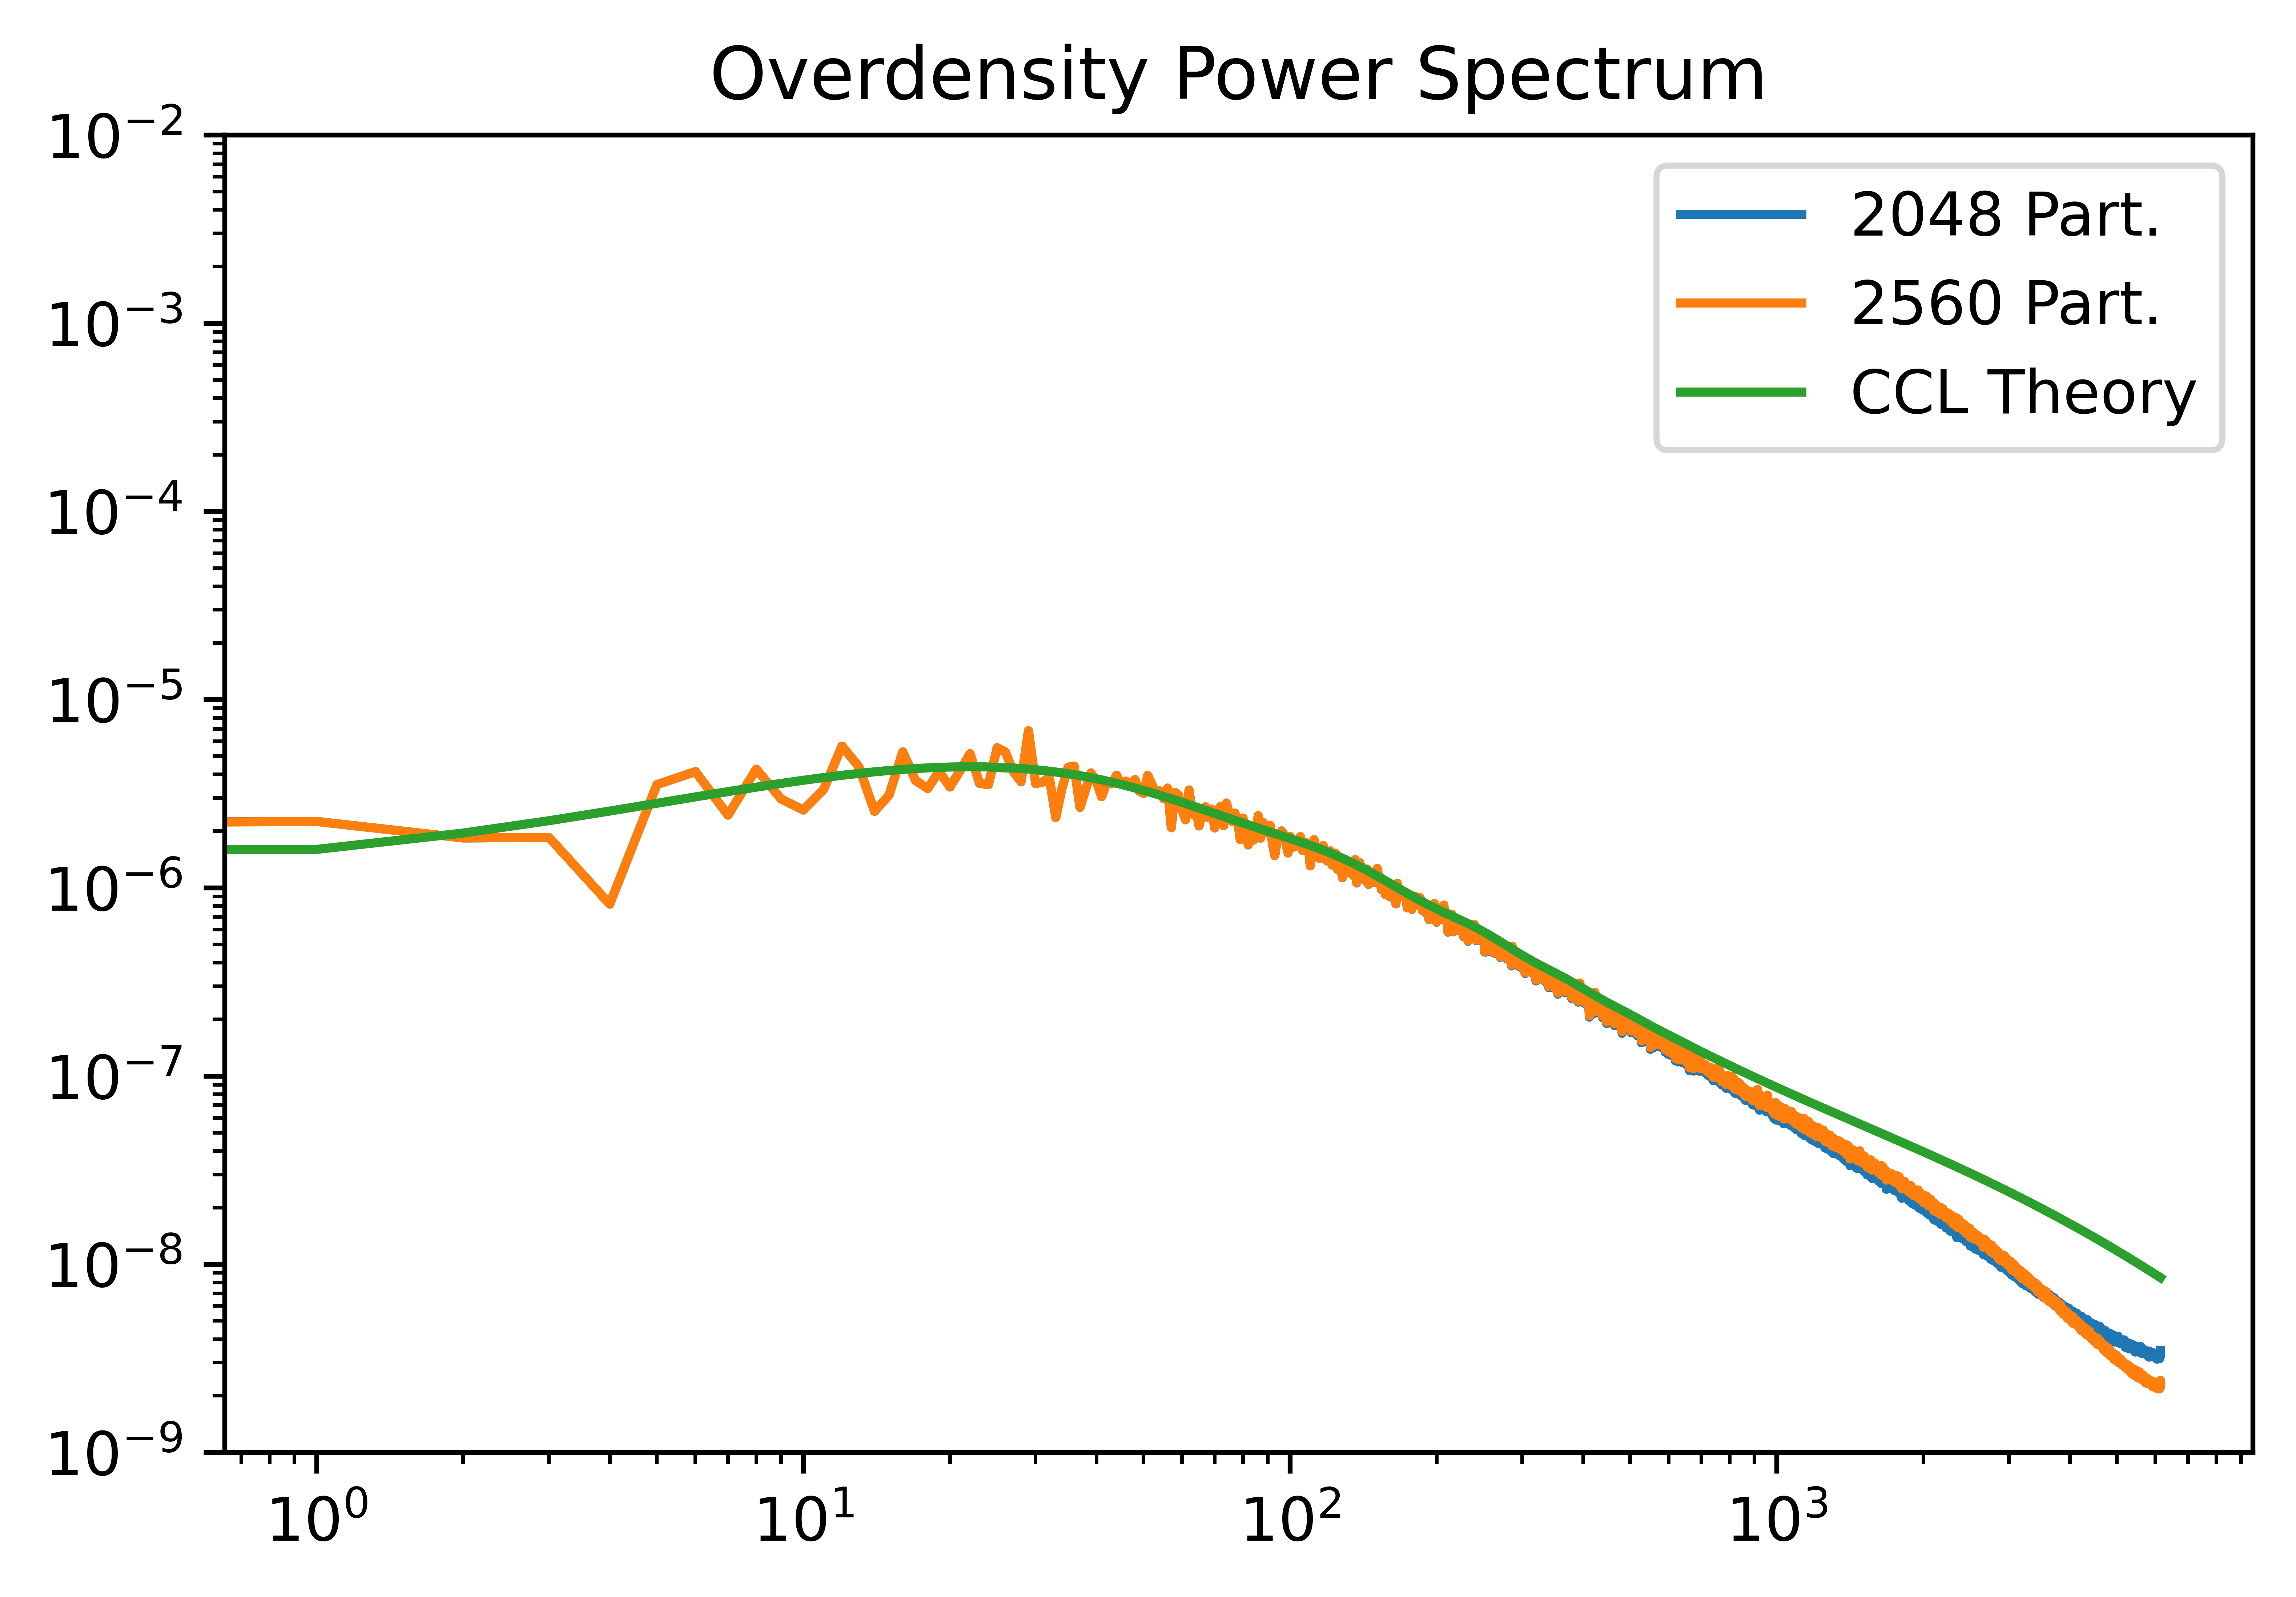

In [12]:
plt.figure(dpi=1200)
plt.loglog(psOver2048);
plt.loglog(psOver2560)
plt.loglog(cls_clu);
plt.legend(loc=0, labels=["2048 Part.","2560 Part.","CCL Theory"])
plt.title("Overdensity Power Spectrum")
plt.ylim(10**-9,10**-2)
plt.show()

## kSZ

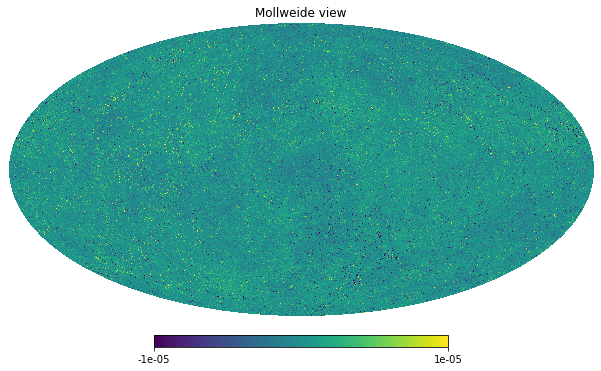

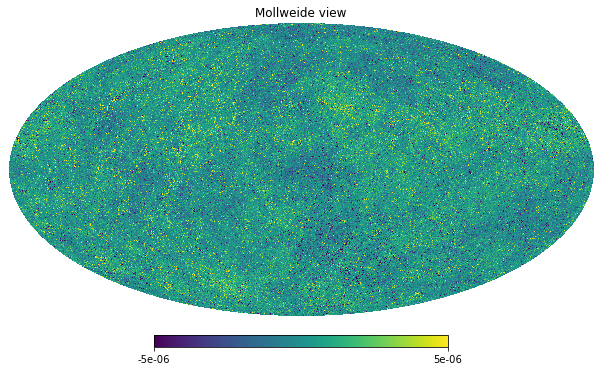

In [13]:
kSZ2048 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2048_DV_256.fits")
kSZ2560 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2560_DV_256.fits")
hp.mollview(kSZ2048,xsize=6400, min=-10*10**-6,max=10*10**-6)
hp.mollview(kSZ2560,xsize=6400, min=-5*10**-6,max=5*10**-6)

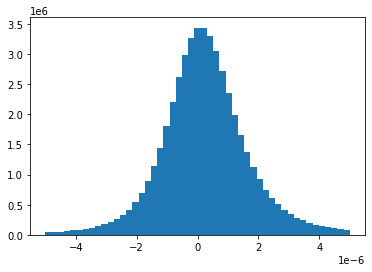

In [14]:
plt.hist(kSZ2048,bins = np.linspace(-5*10**-6,5*10**-6));

In [15]:
pskSZ2560 = hp.sphtfunc.anafast(kSZ2560)
pskSZ2048 = hp.sphtfunc.anafast(kSZ2048)

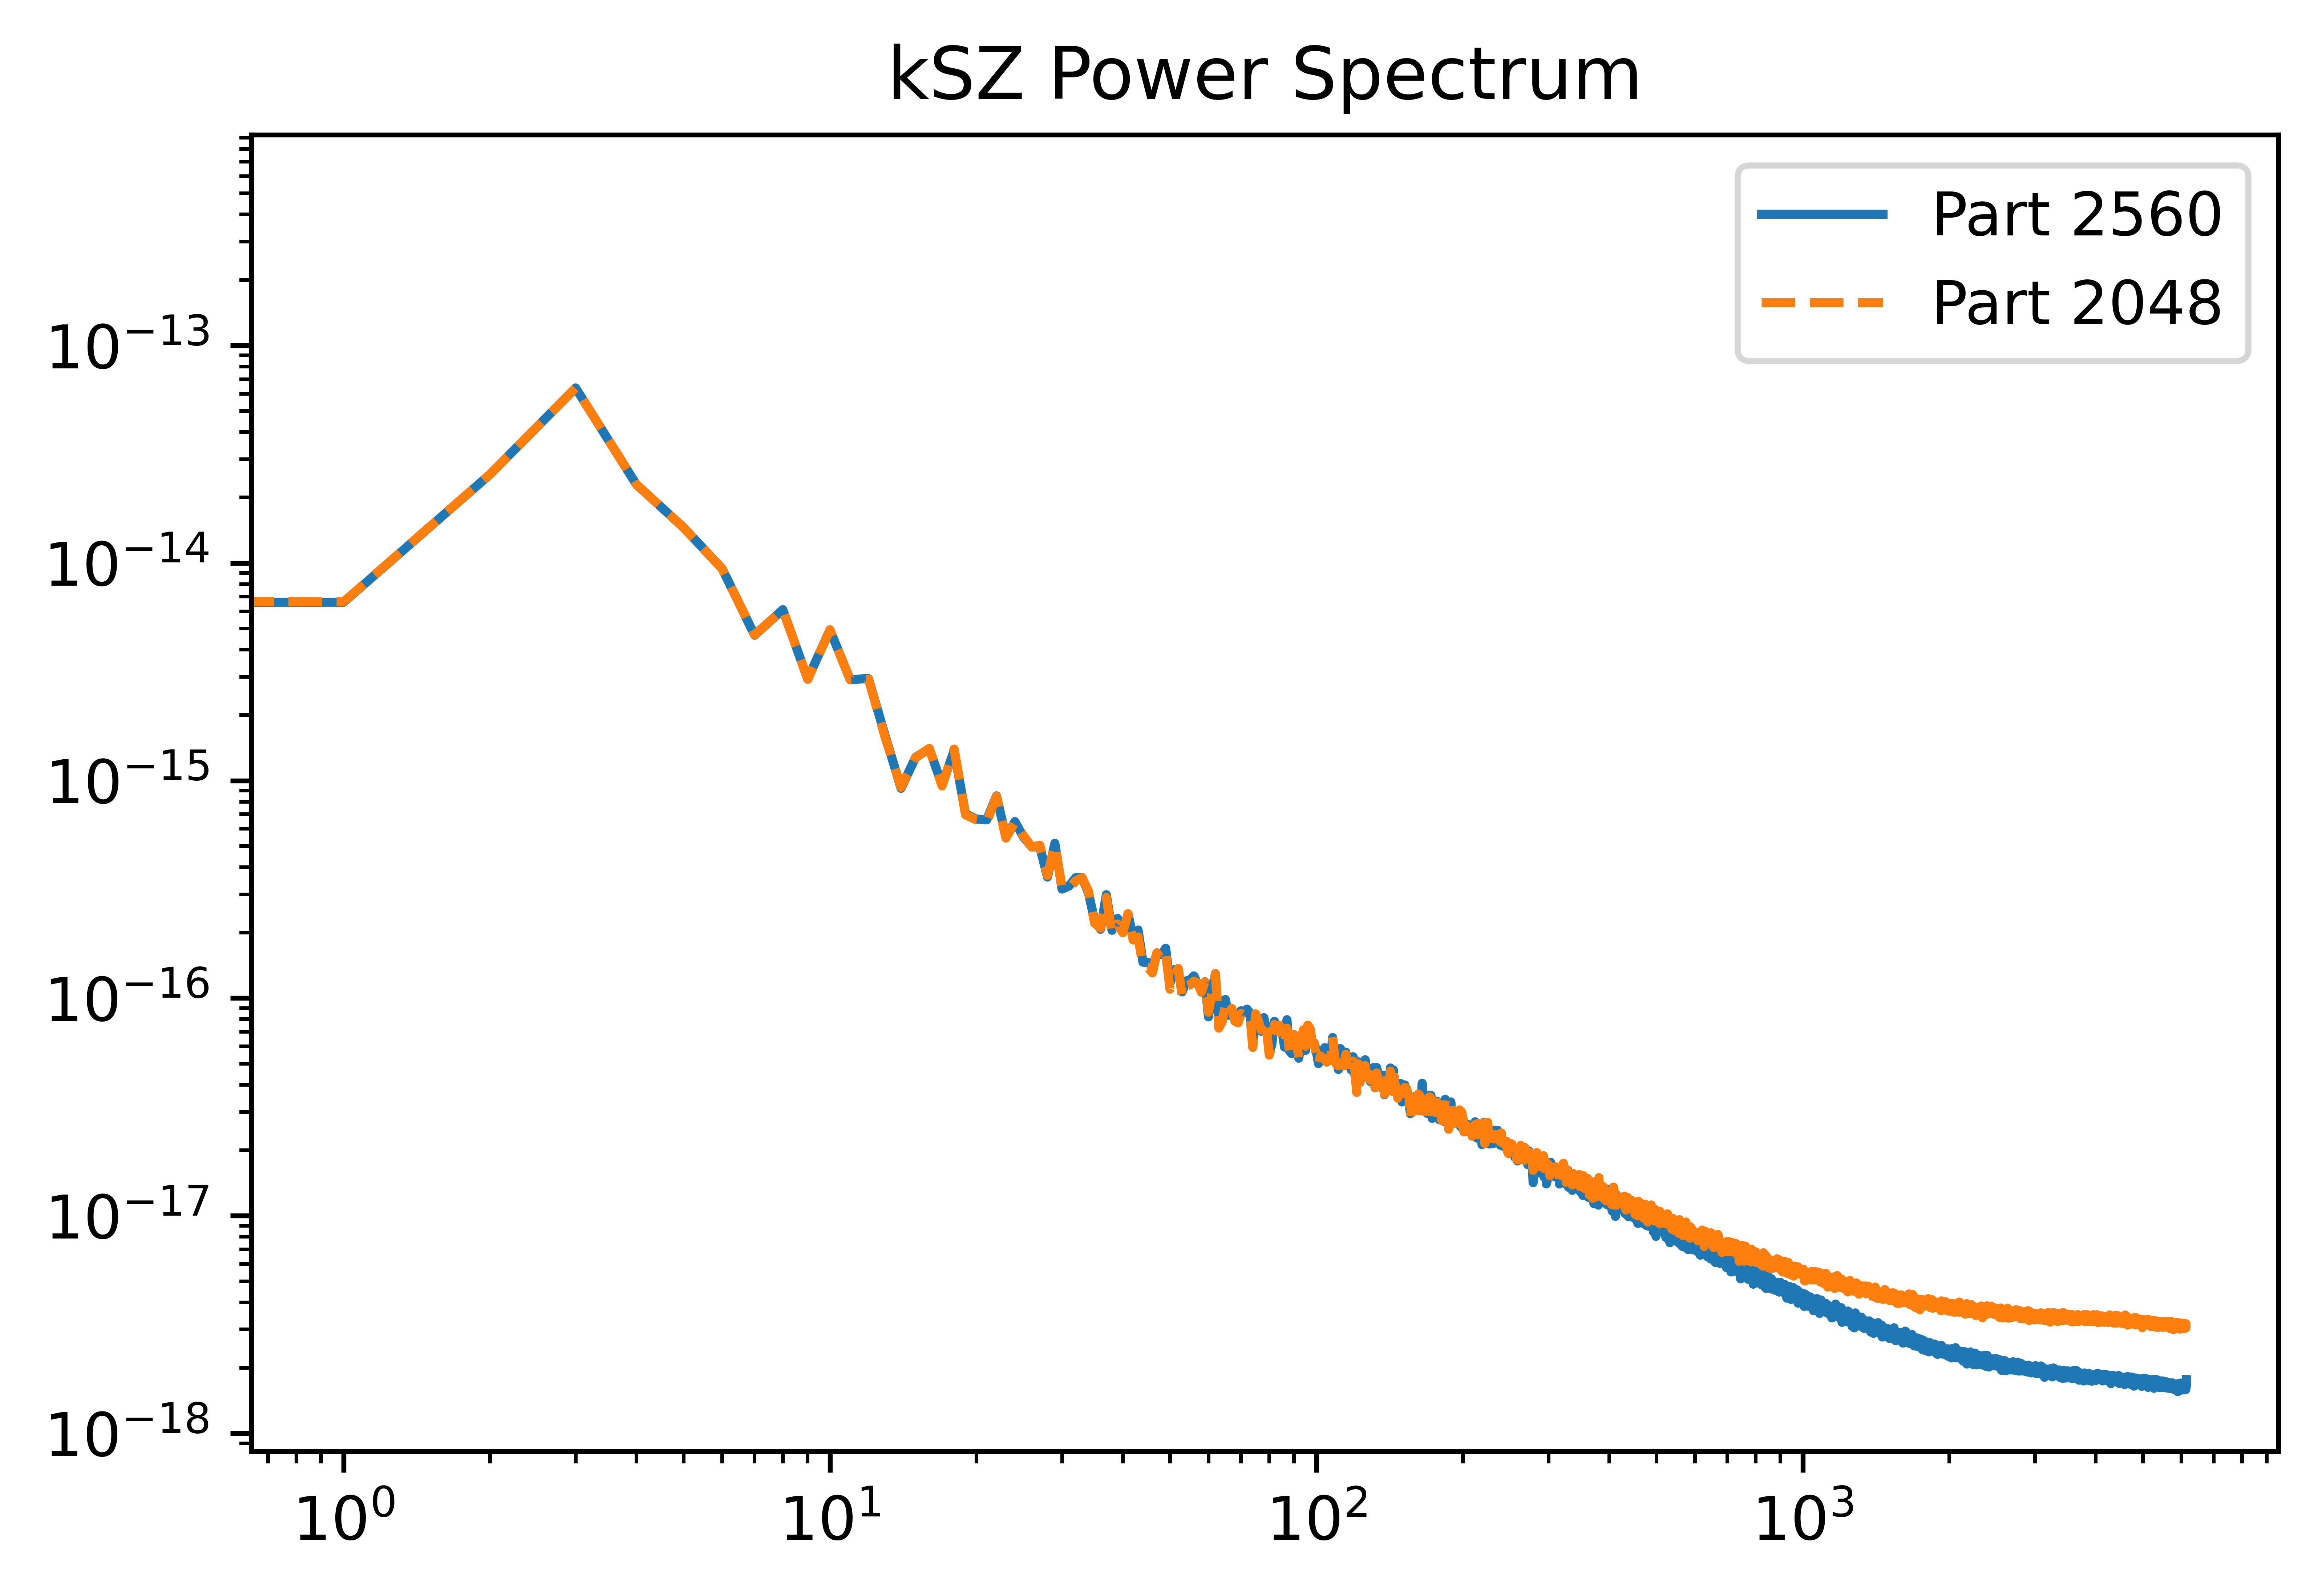

In [16]:
plt.figure(dpi=1200)
plt.loglog(pskSZ2560);
plt.loglog(pskSZ2048,"--");
plt.legend(loc=0, labels=["Part 2560","Part 2048"])
plt.title("kSZ Power Spectrum")
plt.show()

# Convergence

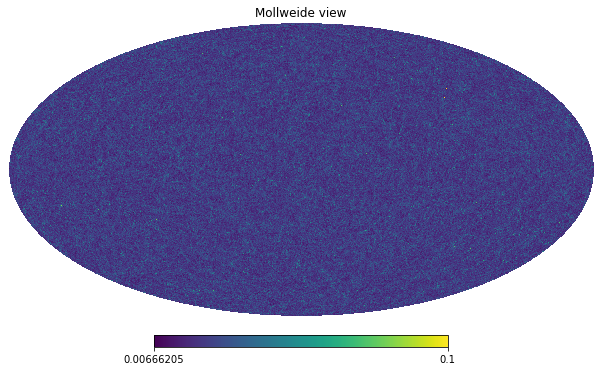

In [17]:
convergence2048 = hp.read_map("MAPS/convergence_NS_2048_R_2048_P_2048_DV_256.fits")
convergence2560 = hp.read_map("MAPS/convergence_NS_2048_R_2048_P_2560_DV_256.fits")
hp.mollview(convergence2560,xsize=3200, max=.1)

In [18]:
psK2560 = hp.sphtfunc.anafast(convergence2560)
psK2048 = hp.sphtfunc.anafast(convergence2048)

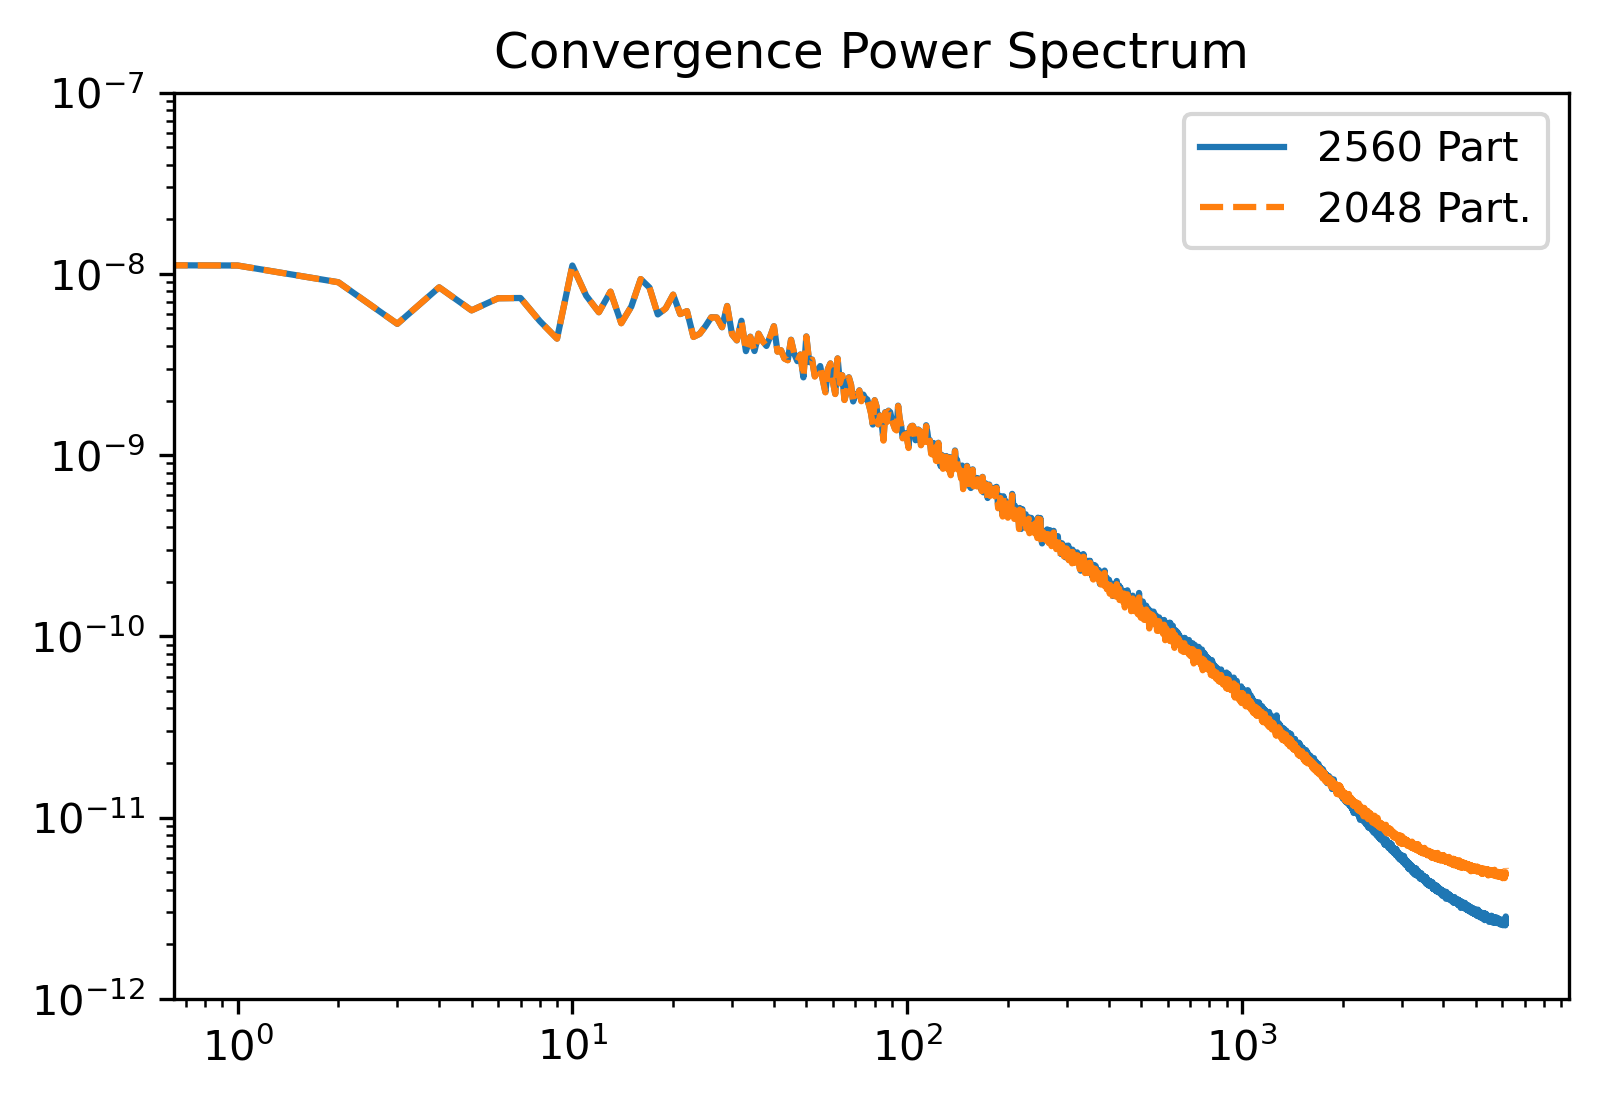

In [19]:
plt.figure(dpi=300)
plt.loglog(psK2560);
plt.loglog(psK2048,"--");
plt.legend(loc=0, labels=["2560 Part","2048 Part."])
plt.title("Convergence Power Spectrum")
plt.ylim(10**-12,10**-7)
plt.show()

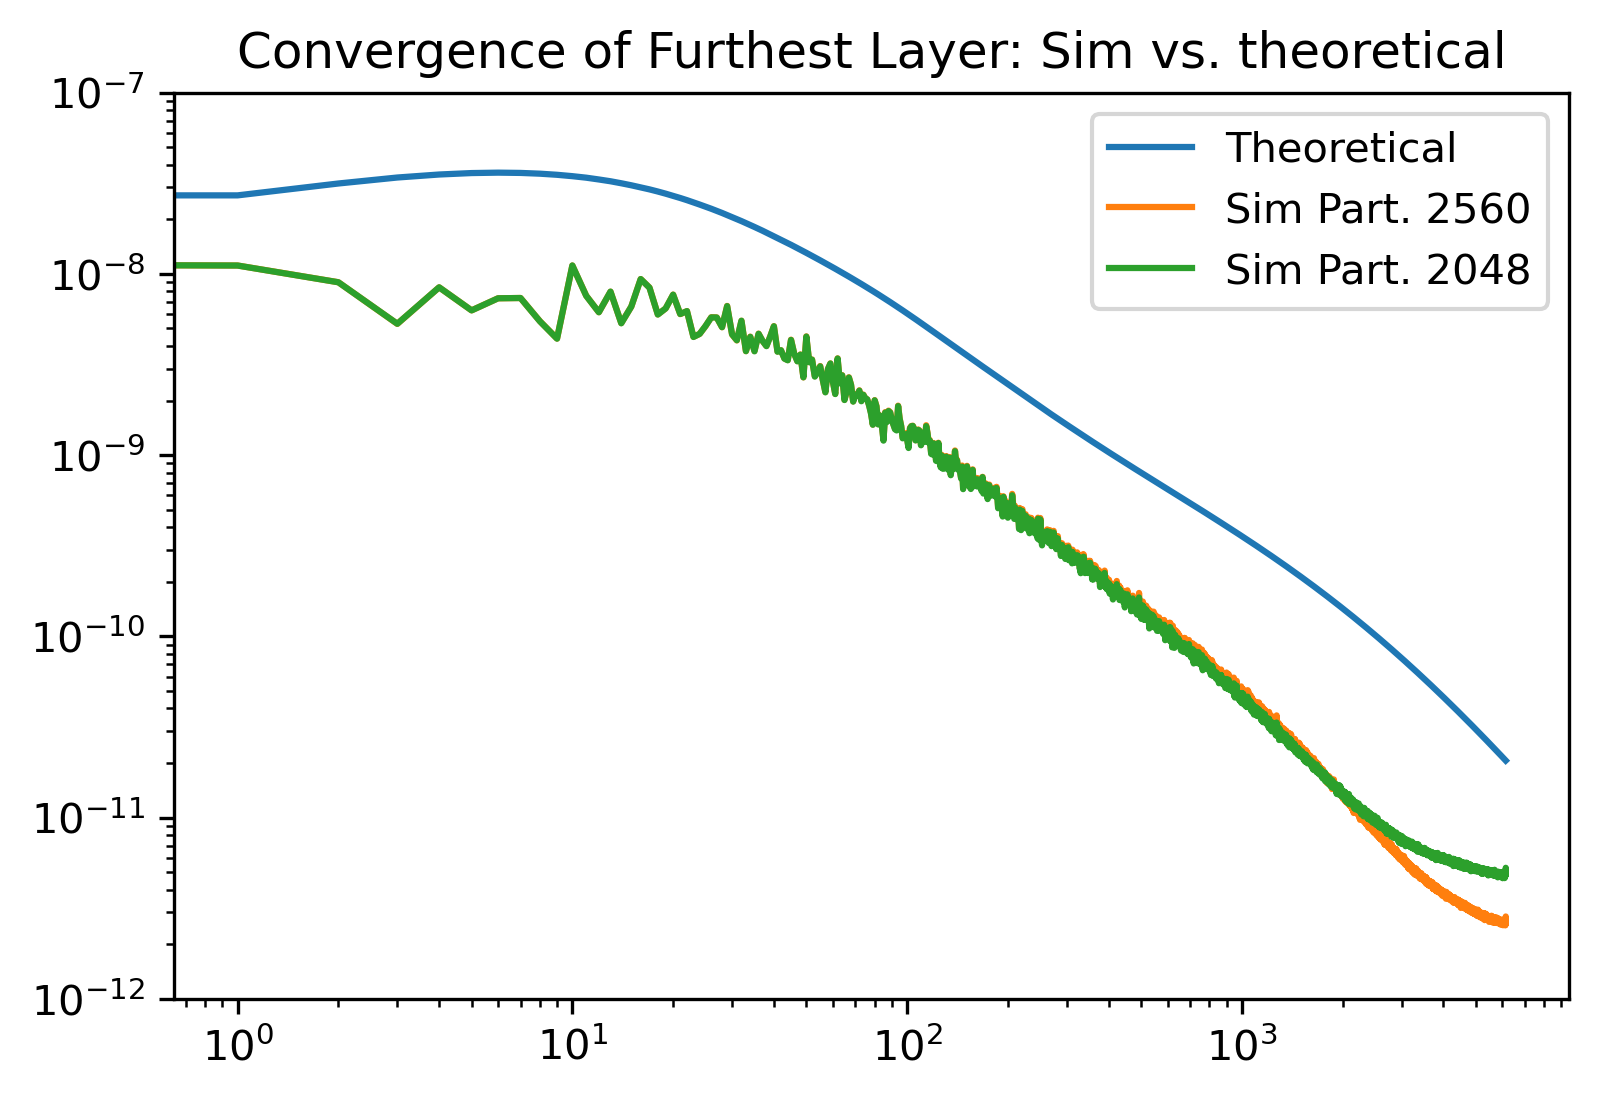

In [54]:
plt.figure(dpi=300)
plt.loglog(cls_Layer);
plt.loglog(psK2560);
plt.loglog(psK2048);
plt.title("Convergence of Furthest Layer: Sim vs. theoretical");
plt.legend(["Theoretical","Sim Part. 2560", "Sim Part. 2048"]);
plt.ylim([10**-12,10**-7]);

# Lensed kSZ

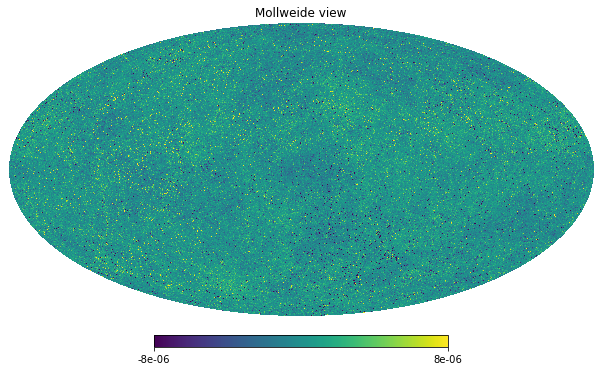

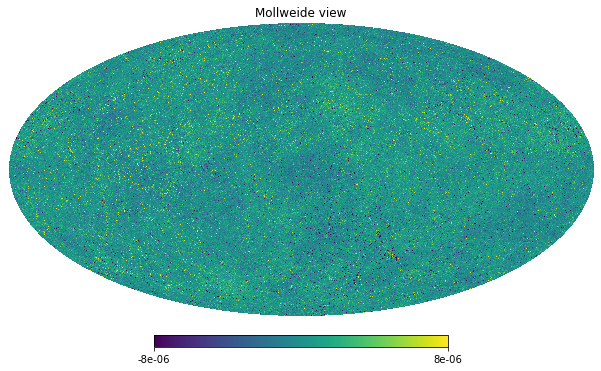

In [21]:
kSZLens2048 = hp.read_map("MAPS/lensedkSZ_NS_2048_R_2048_P_2048_DV_256.fits")
kSZUnLens2048 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2048_DV_256.fits")
kSZLens2560 = hp.read_map("MAPS/lensedkSZ_NS_2048_R_2048_P_2560_DV_256.fits")
kSZUnLens2560 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2560_DV_256.fits")
hp.mollview(kSZLens2048,xsize=6400, min=-8*10**-6,max=8*10**-6)
hp.mollview(kSZUnLens2048,xsize=6400, min=-8*10**-6,max=8*10**-6)

In [22]:
psLens2048 = hp.sphtfunc.anafast(kSZLens2048)
psUnLens2048 = hp.sphtfunc.anafast(kSZUnLens2048)
psLens2560 = hp.sphtfunc.anafast(kSZLens2560)
psUnLens2560 = hp.sphtfunc.anafast(kSZUnLens2560)

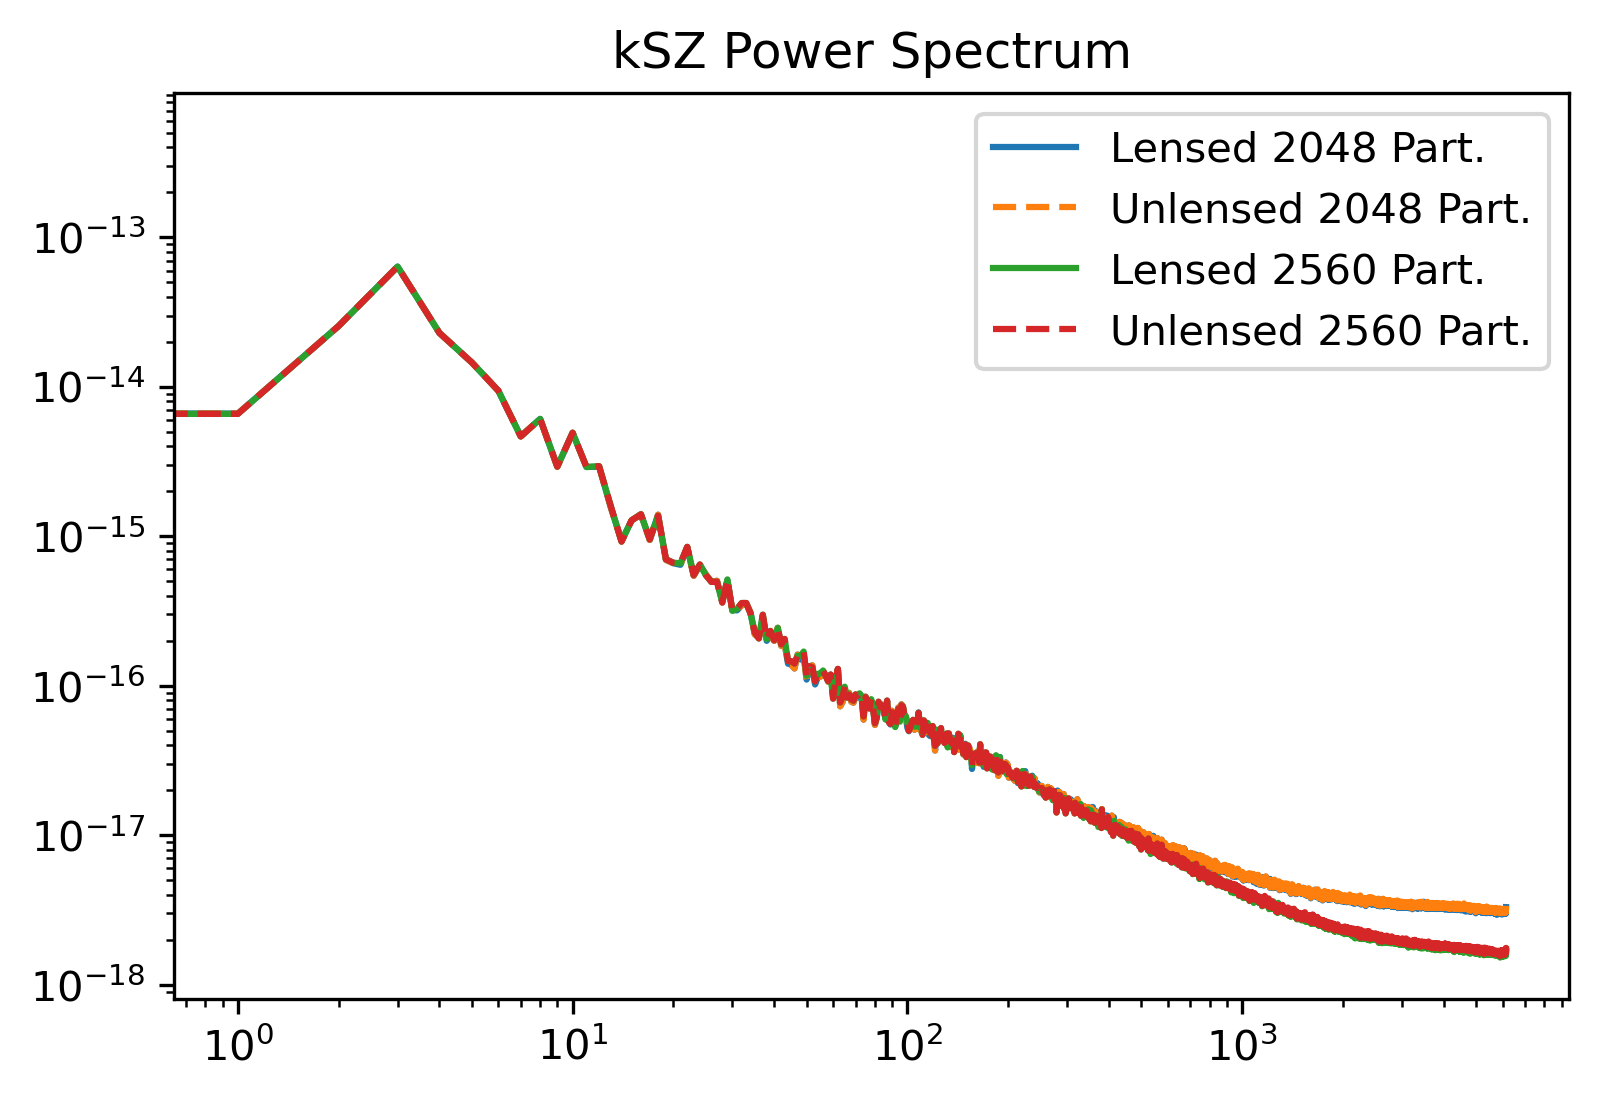

In [23]:
lFactor=np.arange(len(psLens2048))*(np.arange(len(psLens2048))+1)
plt.figure(dpi=300)
plt.loglog(psLens2048);
plt.loglog(psUnLens2048,"--");
plt.loglog(psLens2560);
plt.loglog(psUnLens2560,"--");
plt.legend(loc=0, labels=["Lensed 2048 Part.","Unlensed 2048 Part.","Lensed 2560 Part.","Unlensed 2560 Part."])
plt.title("kSZ Power Spectrum")
plt.show()

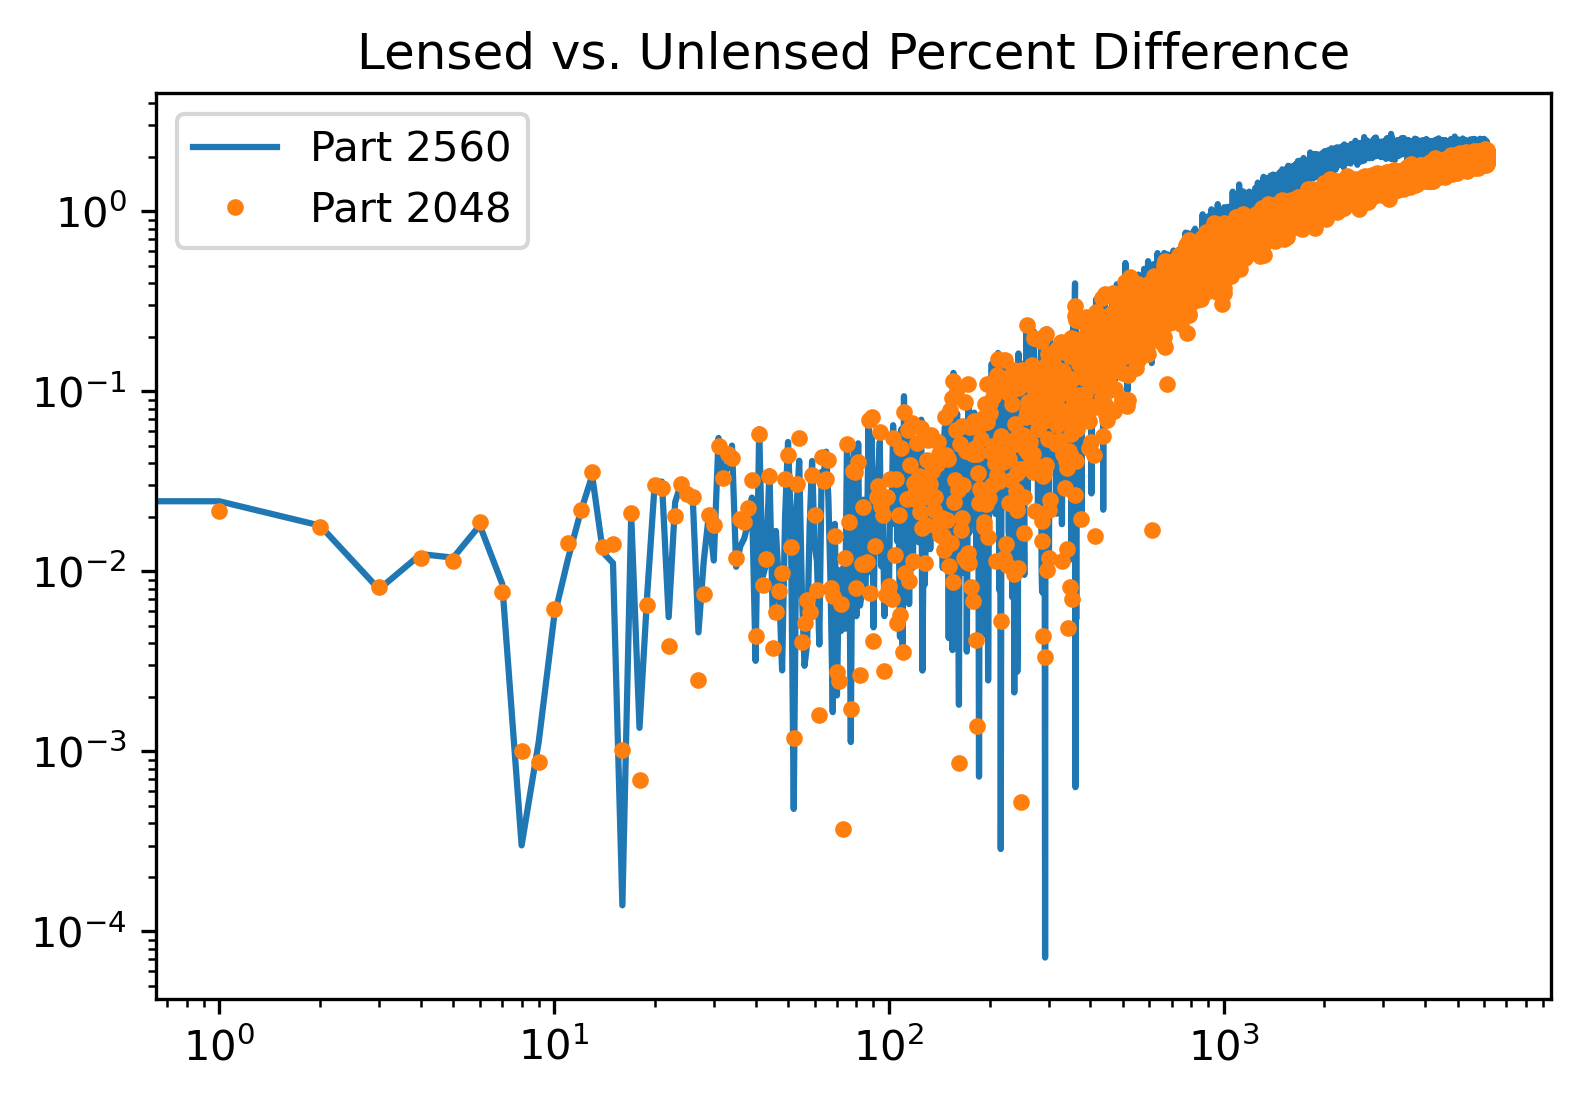

In [24]:
plt.figure(dpi=300)
plt.loglog(np.abs((psLens2560-psUnLens2560)/psLens2560)*100);
plt.loglog(np.abs((psLens2048-psUnLens2048)/psLens2048)*100,".");
plt.legend(loc=0, labels=["Part 2560", "Part 2048"])
plt.title("Lensed vs. Unlensed Percent Difference")
plt.show()

In [25]:
densCrossLens = hp.anafast(overdensity2560,kSZLens2560)
densCrossUnLens = hp.anafast(overdensity2560,kSZUnLens2560)
#densCrossLensS5 = hp.anafast(overdensityS5,kSZLensS5)
#densCrossUnLensS5 = hp.anafast(overdensityS5,kSZUnLensS5)

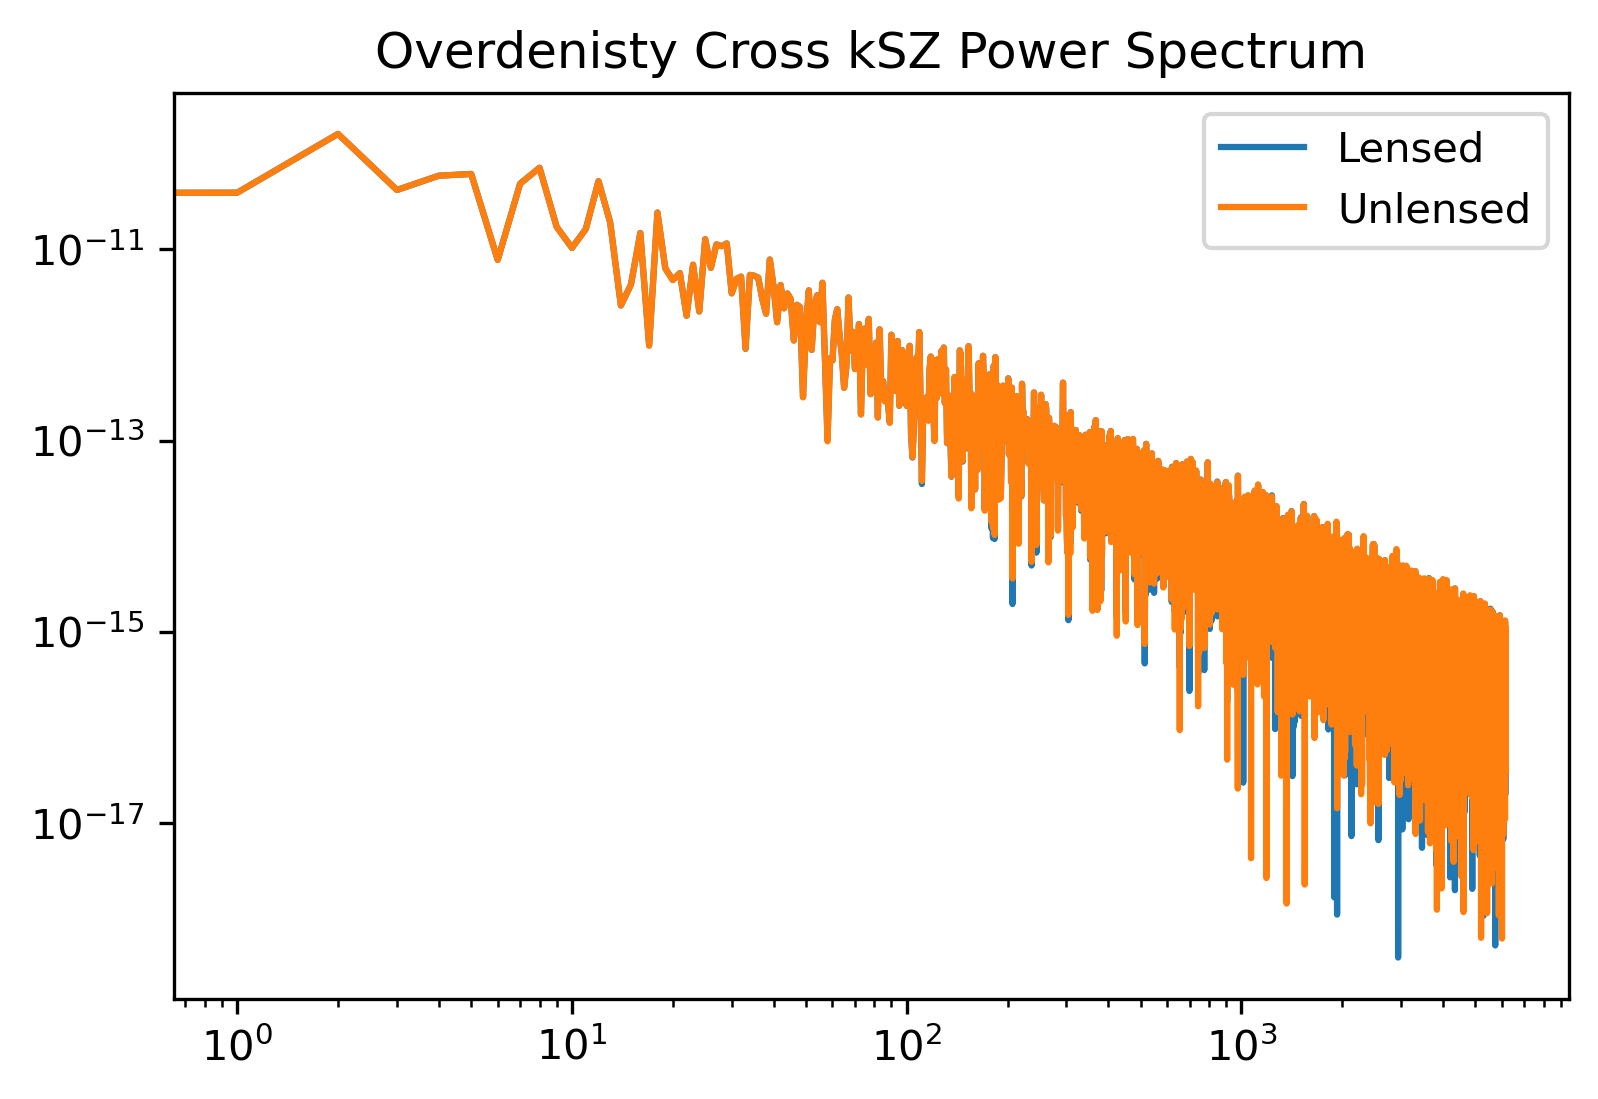

In [26]:
plt.figure(dpi=300)
plt.loglog(np.abs(densCrossLens),markersize=1);
plt.loglog(np.abs(densCrossUnLens),markersize=1);
#plt.loglog(np.abs(densCrossLensS5),markersize=1);
#plt.loglog(np.abs(densCrossUnLensS5),markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])#,"Lensed S5","Unlensed S5"])
plt.title("Overdenisty Cross kSZ Power Spectrum")
plt.show()

In [27]:
#TODO use andrina's edges things
edges = np.linspace(0,6300,num=100).astype(np.int64)
densCrossLensBin = [0]*(len(edges)-1)
densCrossUnLensBin = [0]*(len(edges)-1)
#densCrossLensS5Bin = [0]*(len(edges)-1)
#densCrossUnLensS5Bin = [0]*(len(edges)-1)

for i in range(len(edges)-1):
    densCrossLensBin[i] = np.mean(densCrossLens[edges[i]:edges[i+1]])
    densCrossUnLensBin[i] = np.mean(densCrossUnLens[edges[i]:edges[i+1]])
    #densCrossLensS5Bin[i] = np.mean(densCrossLensS5[edges[i]:edges[i+1]])
    #densCrossUnLensS5Bin[i] = np.mean(densCrossUnLensS5[edges[i]:edges[i+1]])

/home/wurdahl/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wurdahl/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


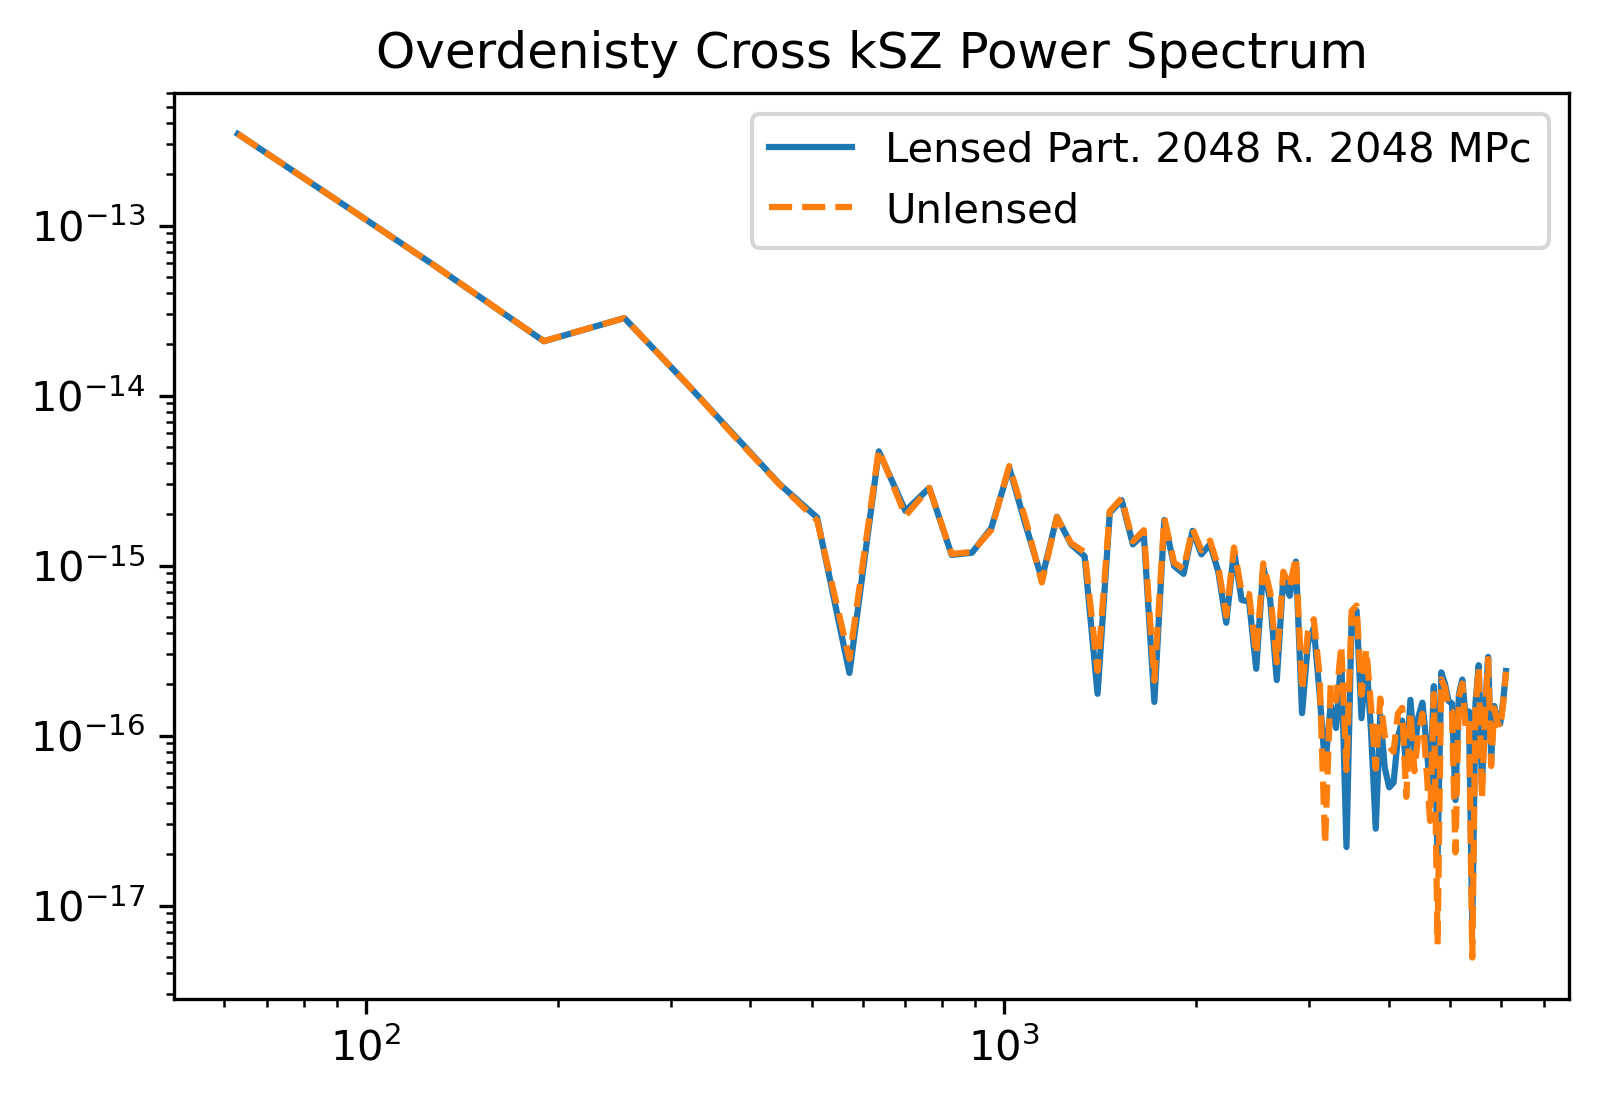

In [28]:
plt.figure(dpi=300)
plt.loglog(edges[1:-1],np.abs(densCrossLensBin[1:]),markersize=1);
plt.loglog(edges[1:-1],np.abs(densCrossUnLensBin[1:]),"--",markersize=1);
#plt.loglog(edges[1:-1],np.abs(densCrossLensS5Bin[1:]),markersize=1);
#plt.loglog(edges[1:-1],np.abs(densCrossUnLensS5Bin[1:]),"--",markersize=1);
#plt.legend(loc=0, labels=["Lensed 2048 Particles Steps 100","Unlensed 2048 Particles Steps 100","Lensed 1536 Particles Steps 5000","Unlensed 1536 Particles Steps 5000"])
plt.legend(loc=0, labels=["Lensed Part. 2048 R. 2048 MPc", "Unlensed"])
plt.title("Overdenisty Cross kSZ Power Spectrum")
plt.show()

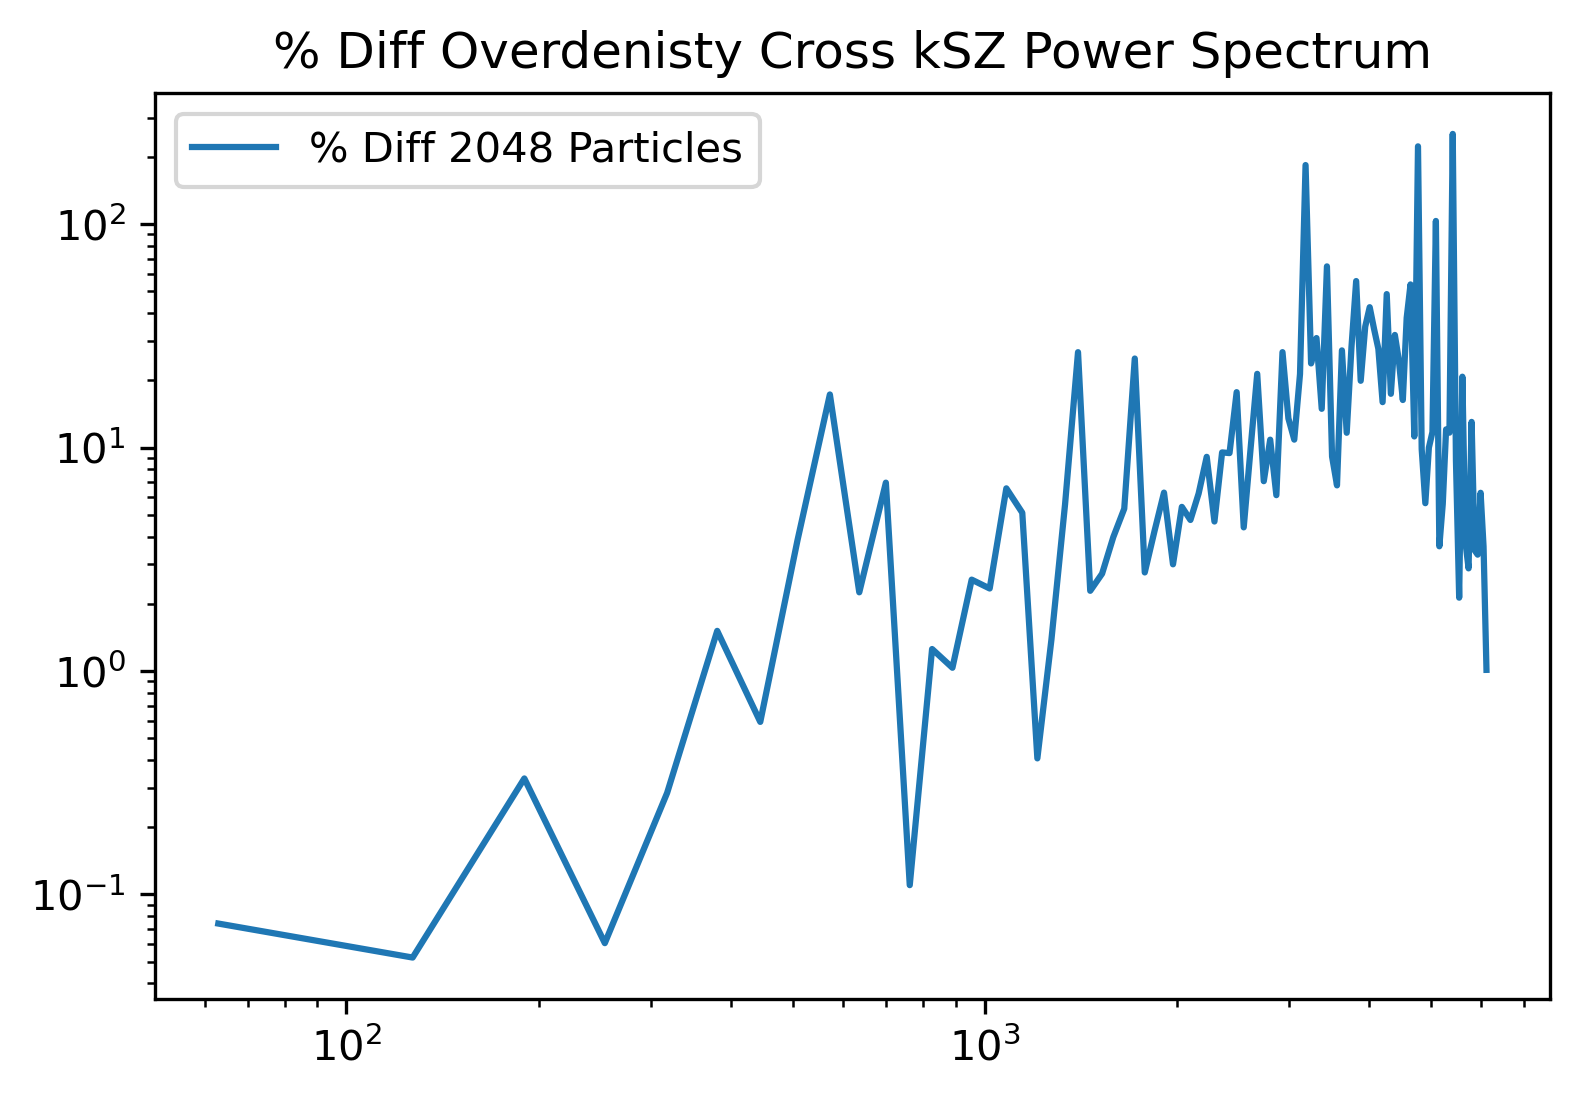

In [29]:
plt.figure(dpi=300)
plt.loglog(edges[1:-1],100*np.abs((np.subtract(densCrossLensBin[1:],densCrossUnLensBin[1:]))/densCrossUnLensBin[1:]),markersize=1);
#plt.loglog(edges[1:-1],100*np.abs((np.subtract(densCrossLensS5Bin[1:],densCrossUnLensS5Bin[1:]))/densCrossUnLensS5Bin[1:]),markersize=1);
plt.legend(loc=0, labels=["% Diff 2048 Particles"])#,"% Diff 1536 Particles Steps 5000"])
plt.title("% Diff Overdenisty Cross kSZ Power Spectrum")
plt.show()

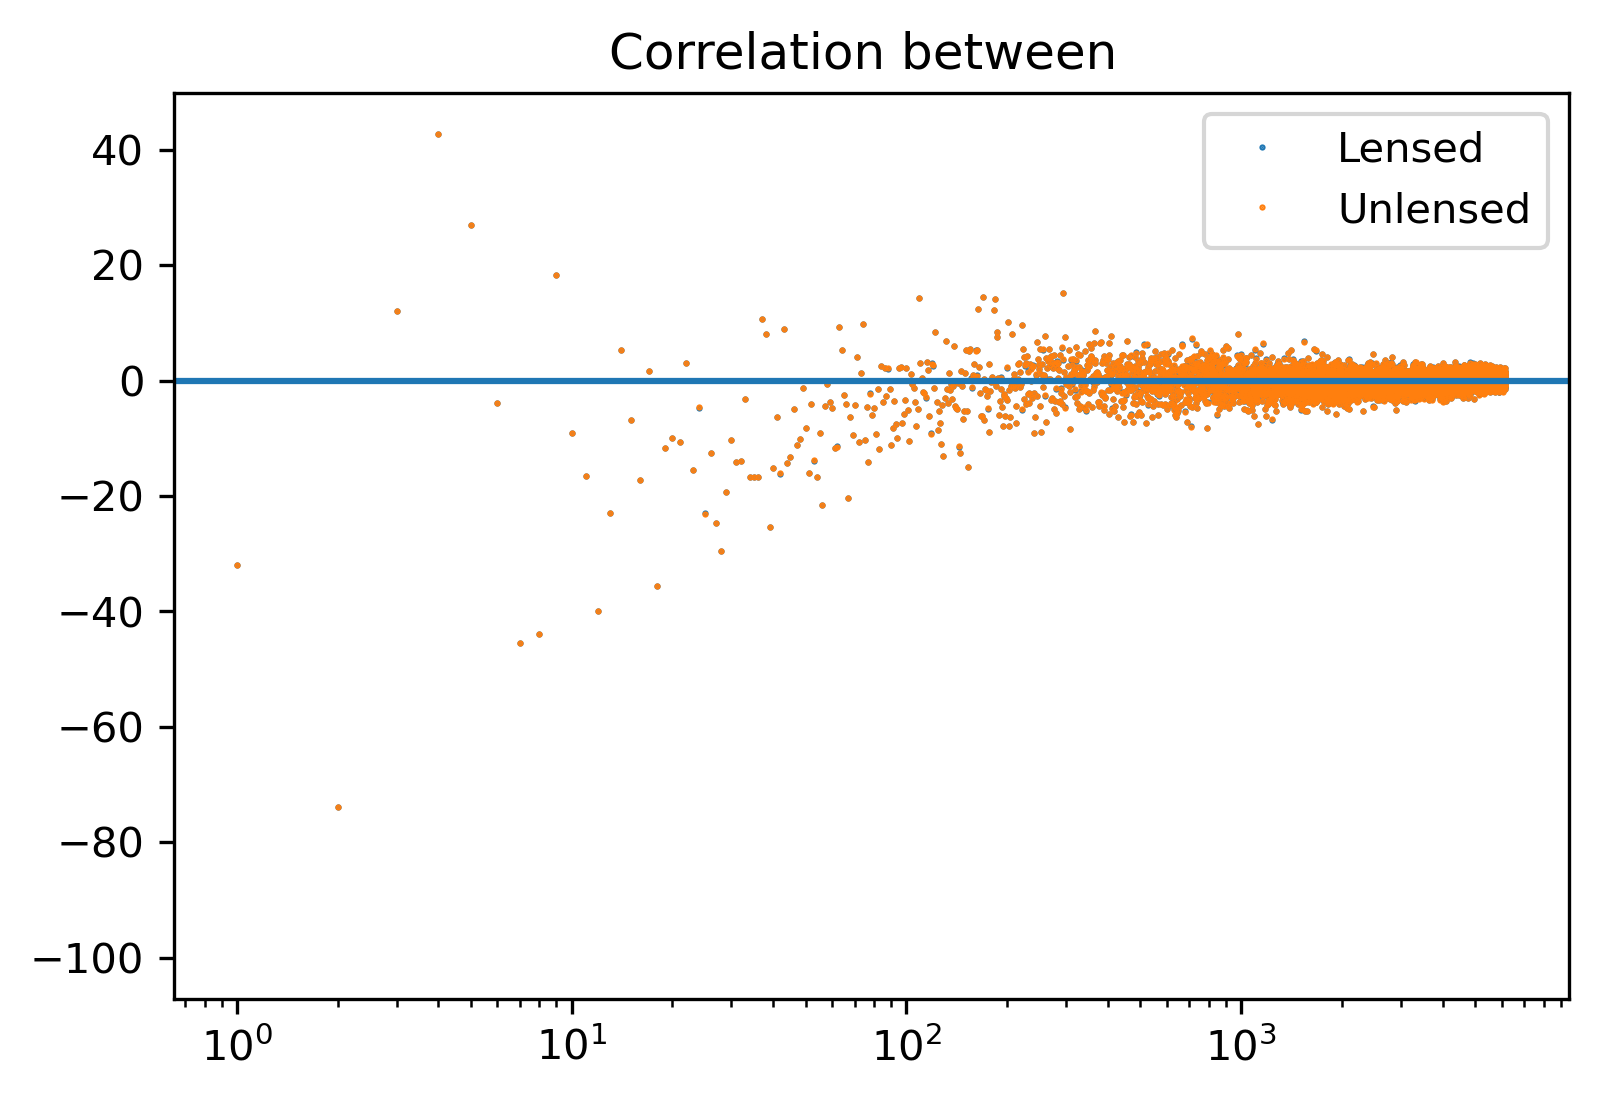

In [30]:
correlationLens = densCrossLens/np.sqrt(psOver2560*psLens2560)
correlationUnLens = densCrossUnLens/np.sqrt(psOver2560*psUnLens2560)
plt.figure(dpi=300)
plt.plot(correlationLens*100,".",markersize=1);
plt.plot(correlationUnLens*100,".",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Correlation between ")
plt.semilogx()
plt.axhline(0)
plt.show()

In [ ]:
plt.figure(dpi=300)
plt.loglog(np.abs((densCrossLens-densCrossUnLens)/densCrossLens)*100,".");
plt.legend(loc=0, labels=["Percent Difference"])
plt.title("Lensed vs. Unlensed Percent Difference")
plt.show()

## Convergence Cross kSZ

In [36]:
kCrosskSZLensed = hp.anafast(convergence2560,kSZLens2560)
kCrosskSZUnLensed = hp.anafast(convergence2560,kSZUnLens2560)

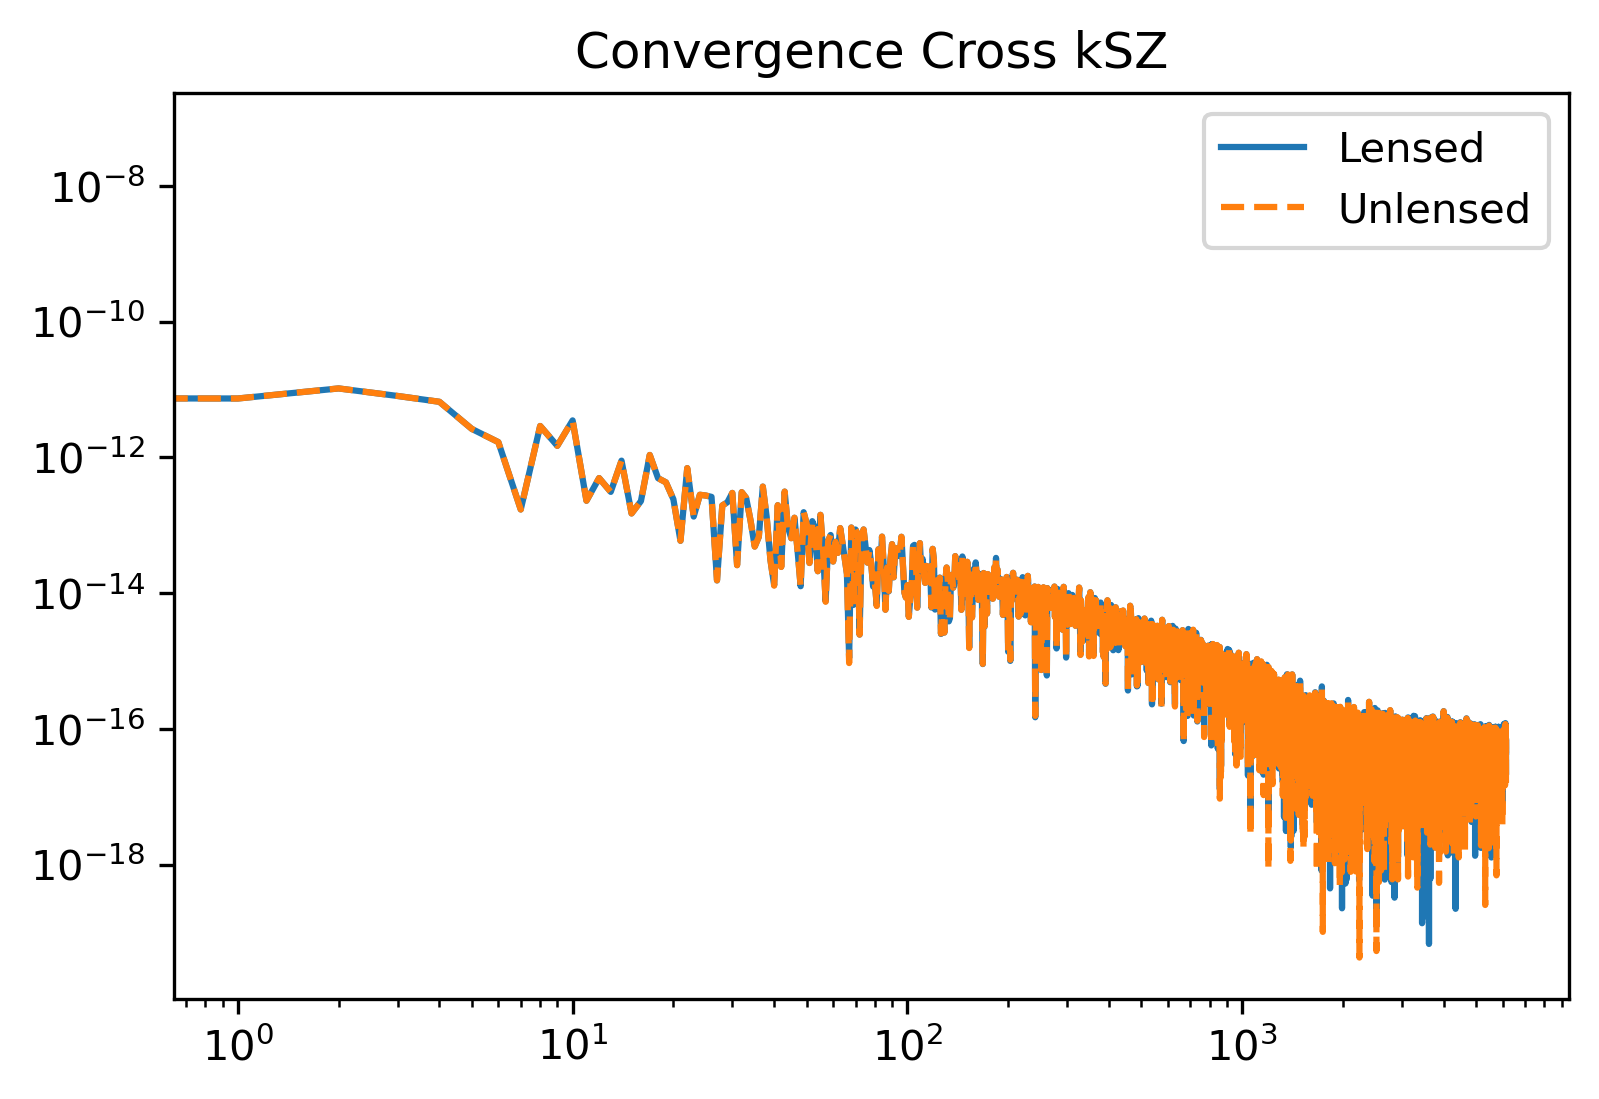

In [37]:
plt.figure(dpi=300)
plt.loglog(np.abs(kCrosskSZLensed),markersize=1);
plt.loglog(np.abs(kCrosskSZUnLensed),"--",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Convergence Cross kSZ")
plt.show()

In [40]:
correlationLenskxkSZ = kCrosskSZLensed/np.sqrt(psK2560*psLens2560)
correlationUnLenskxkSZ = kCrosskSZUnLensed/np.sqrt(psK2560*psUnLens2560)

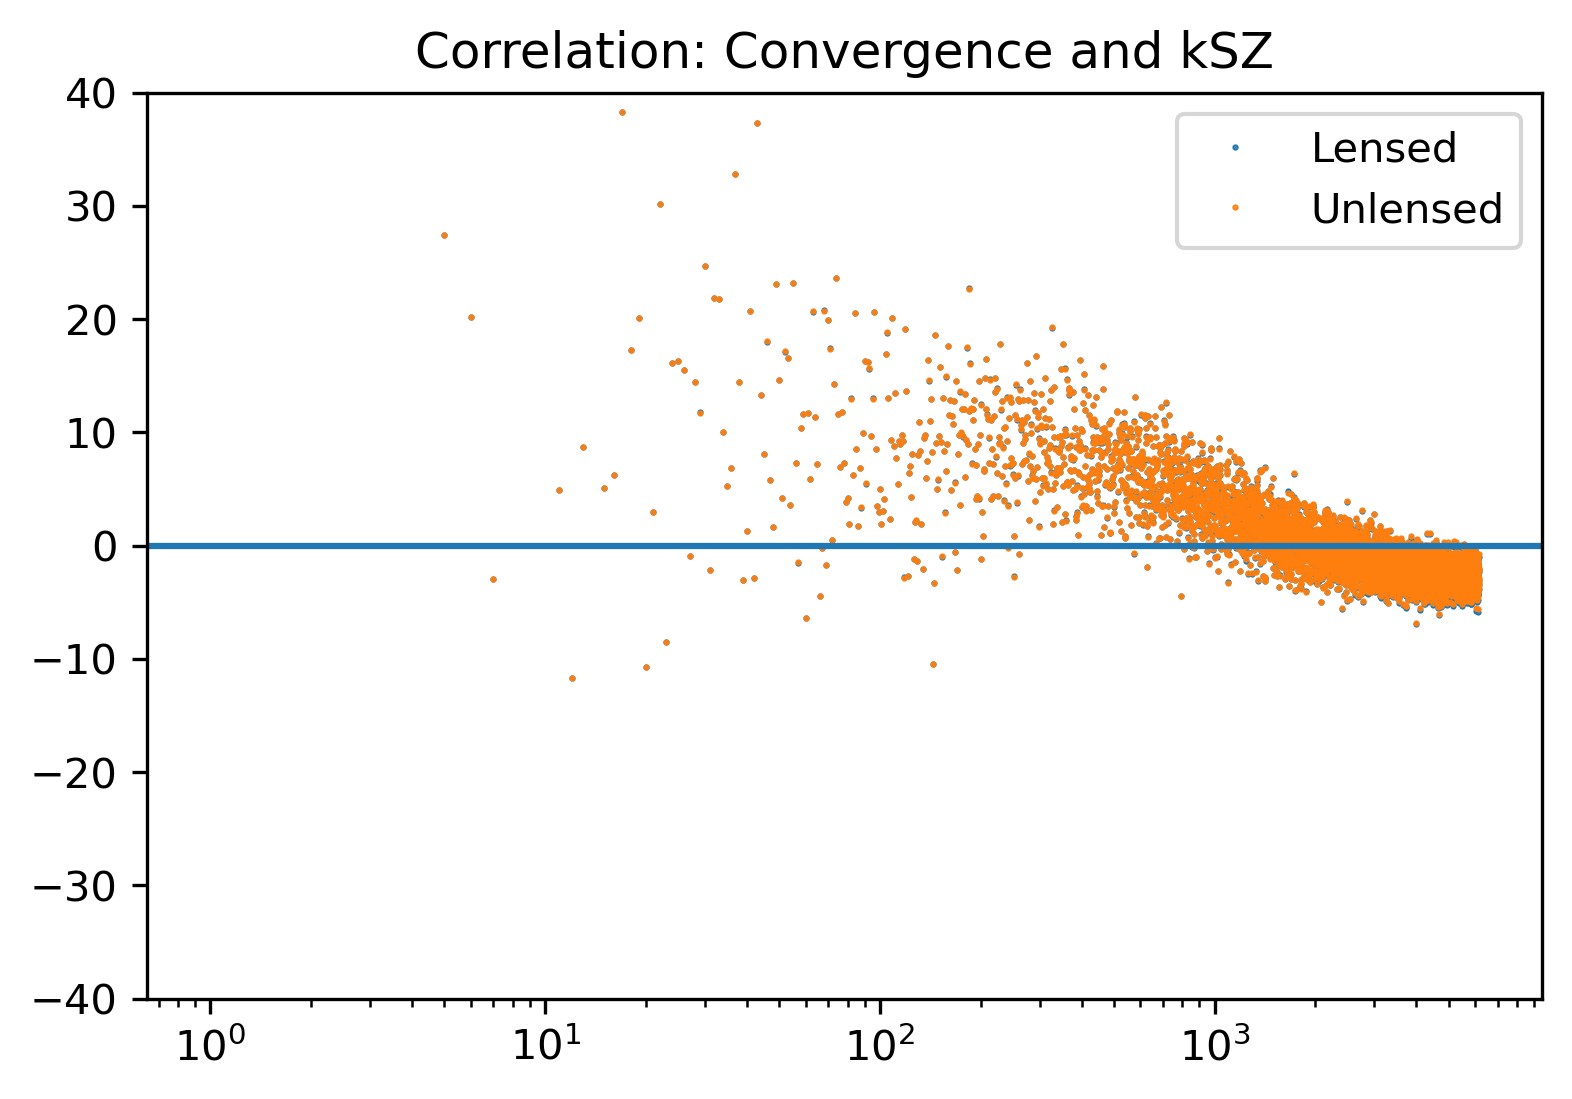

In [41]:
plt.figure(dpi=300)
plt.plot(correlationLenskxkSZ*100,".",markersize=1);
plt.plot(correlationUnLenskxkSZ*100,".",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Correlation: Convergence and kSZ")
plt.semilogx()
plt.axhline(0)
plt.ylim(-40,40)
plt.show()

# Velocity Field Reconstruction

In [42]:
velField = hp.read_map("MAPS/velocityField_NS_2048_R_2048_P_2048_DV_256.fits")

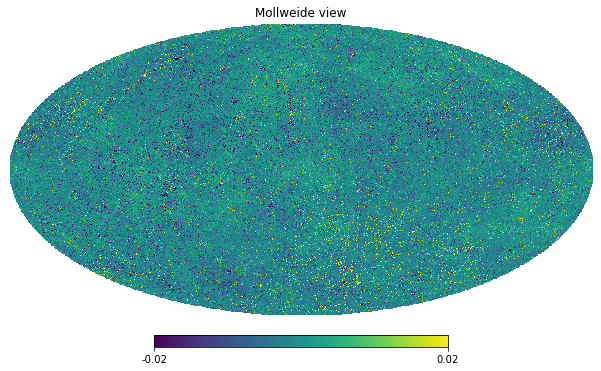

In [43]:
hp.mollview(velField,min=-2*10**-2,max=2*10**-2)

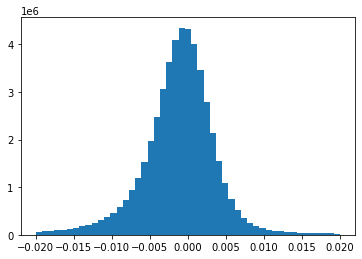

In [44]:
plt.hist(velField,bins = np.linspace(-2*10**-2,2*10**-2));

In [45]:
velGuess = kSZUnLens2048/(overdensity2560+1)

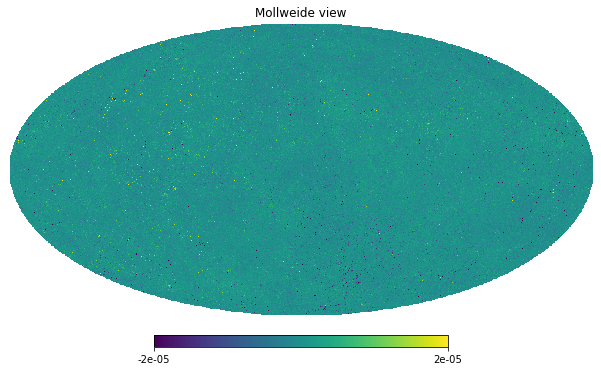

In [46]:
hp.mollview(velGuess,min=-2*10**-5,max=2*10**-5)

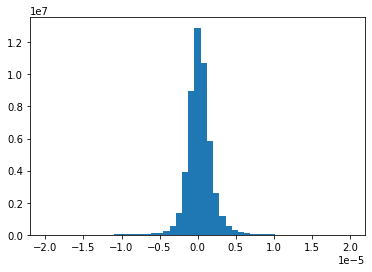

In [47]:
plt.hist(velGuess,bins = np.linspace(-2*10**-5,2*10**-5));

In [48]:
psVelEst = hp.anafast(velGuess)
psVel = hp.anafast(velField)

In [49]:
psGuessCrossActual = hp.anafast(velGuess,velField)

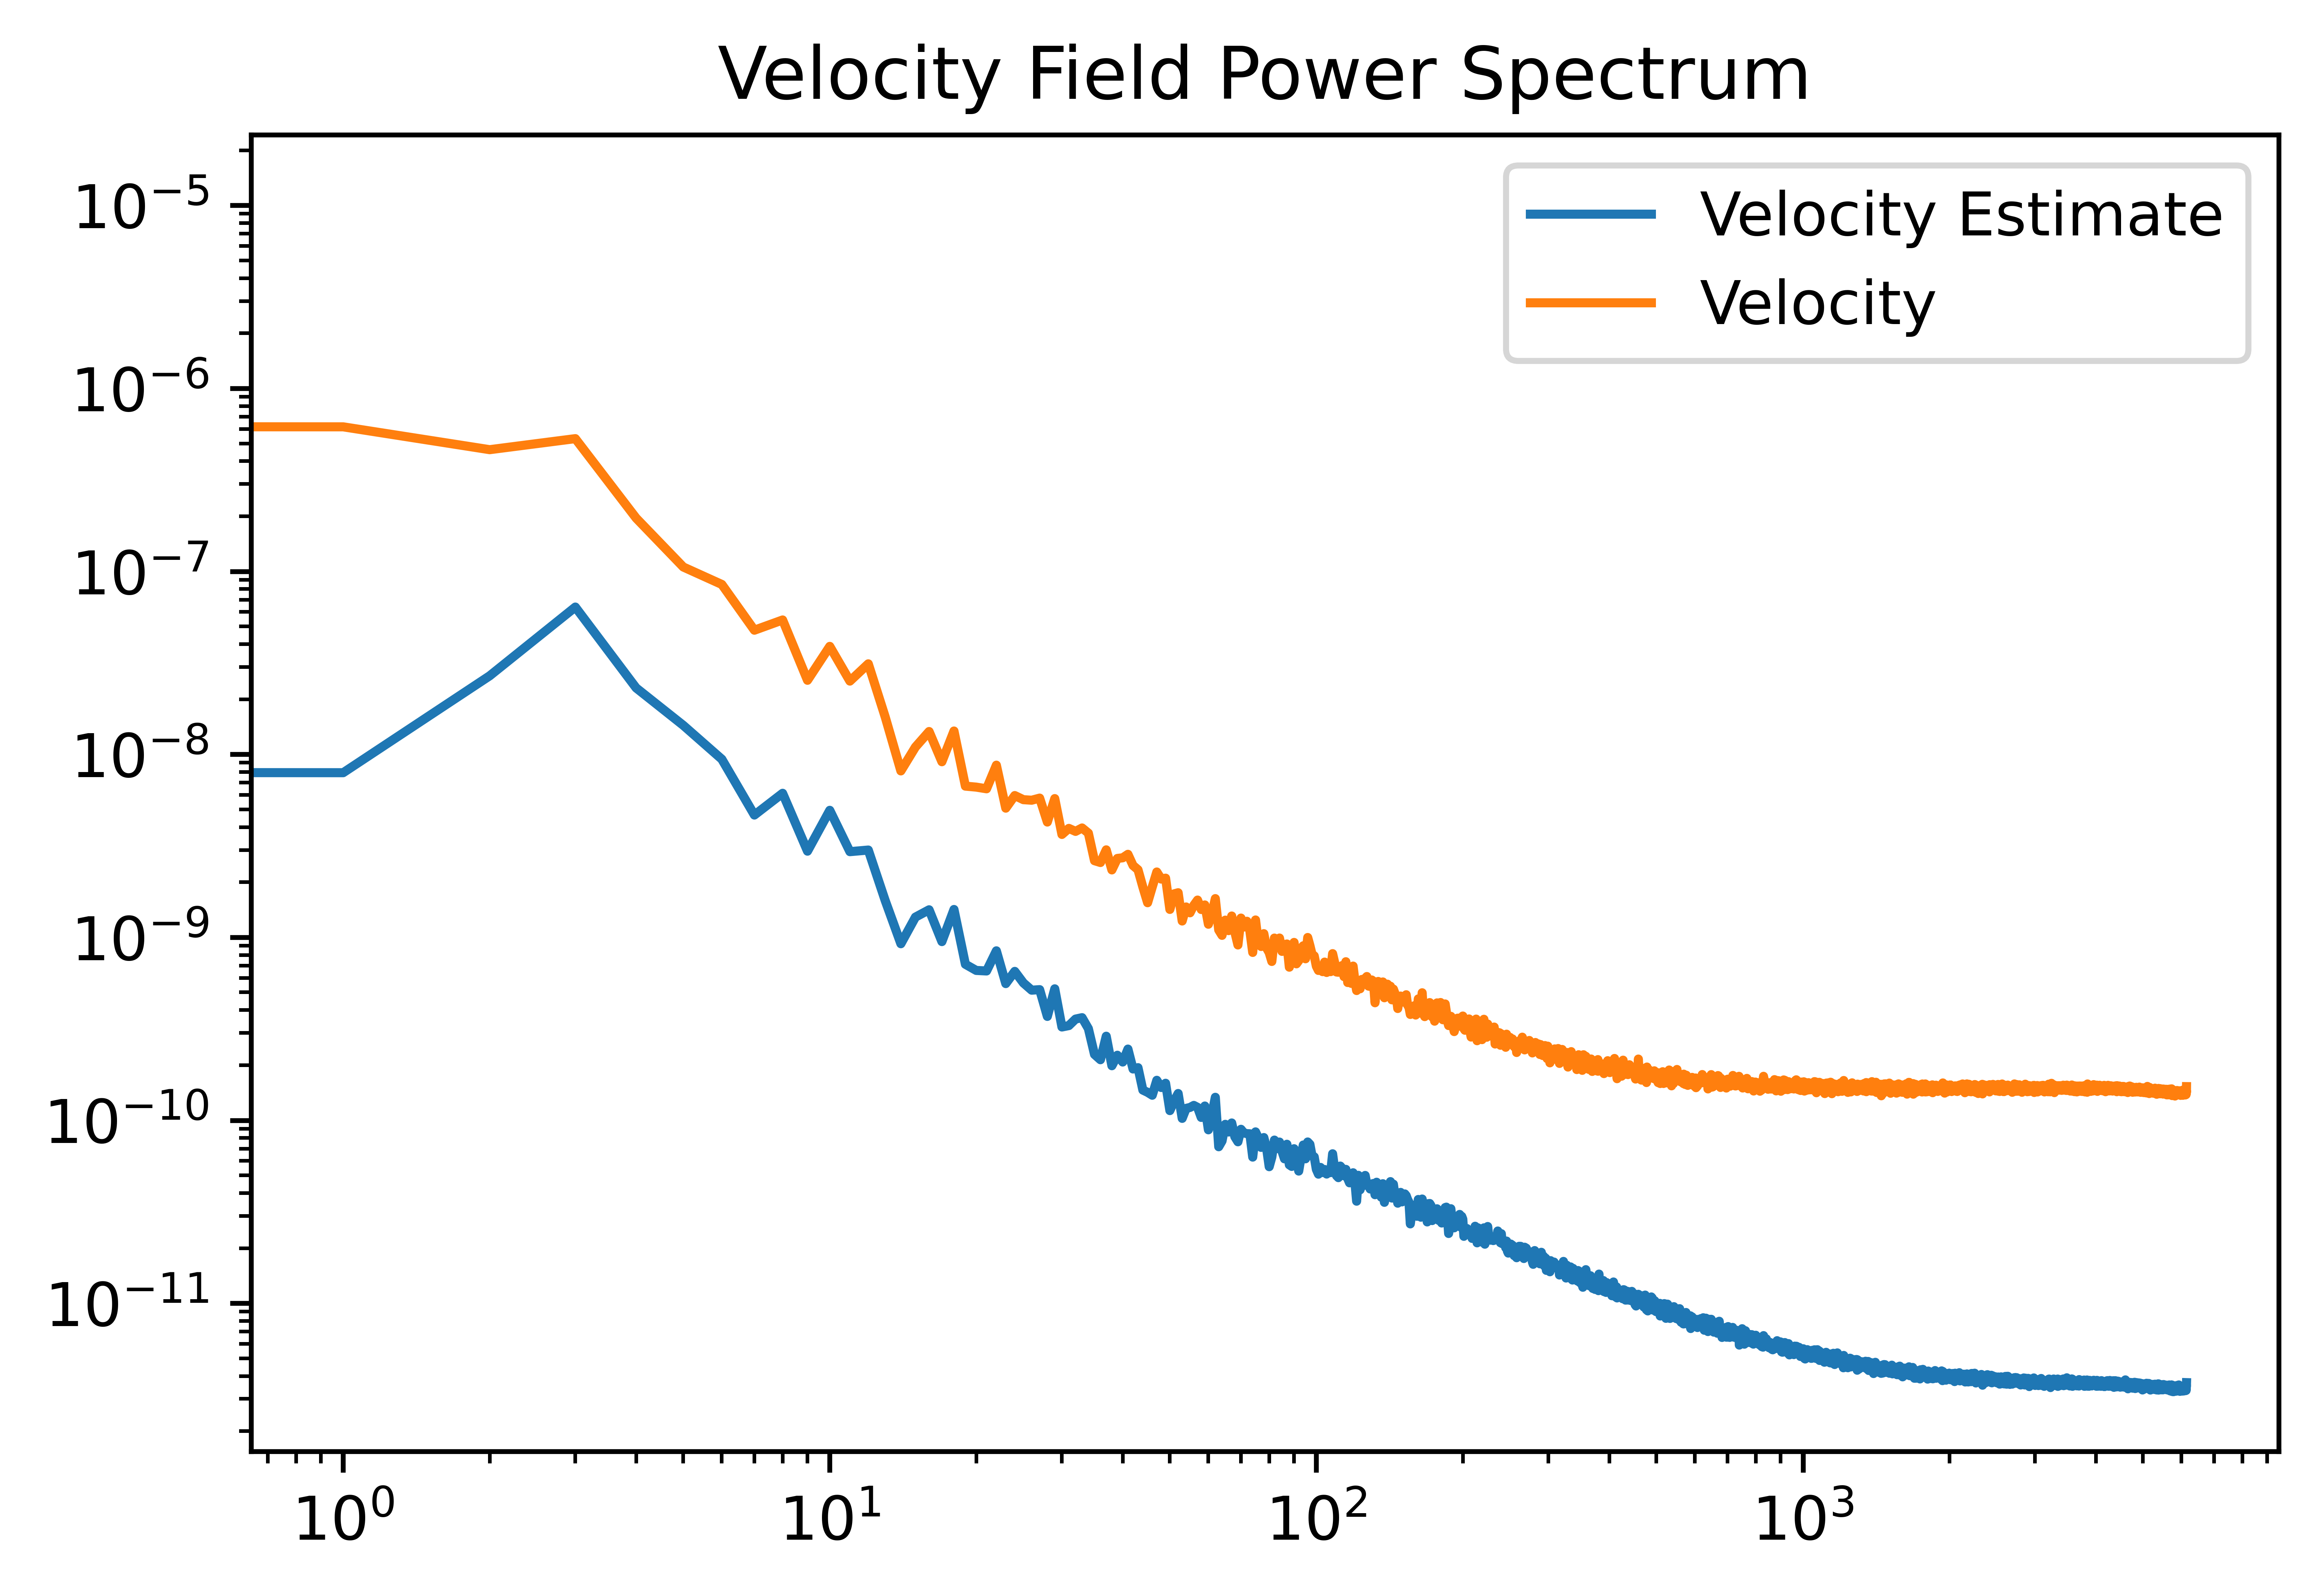

In [50]:
plt.figure(dpi=1200)
plt.loglog(10**6*psVelEst)
plt.loglog(psVel)
plt.legend(loc=0, labels=["Velocity Estimate", "Velocity"])
plt.title("Velocity Field Power Spectrum")
plt.show()

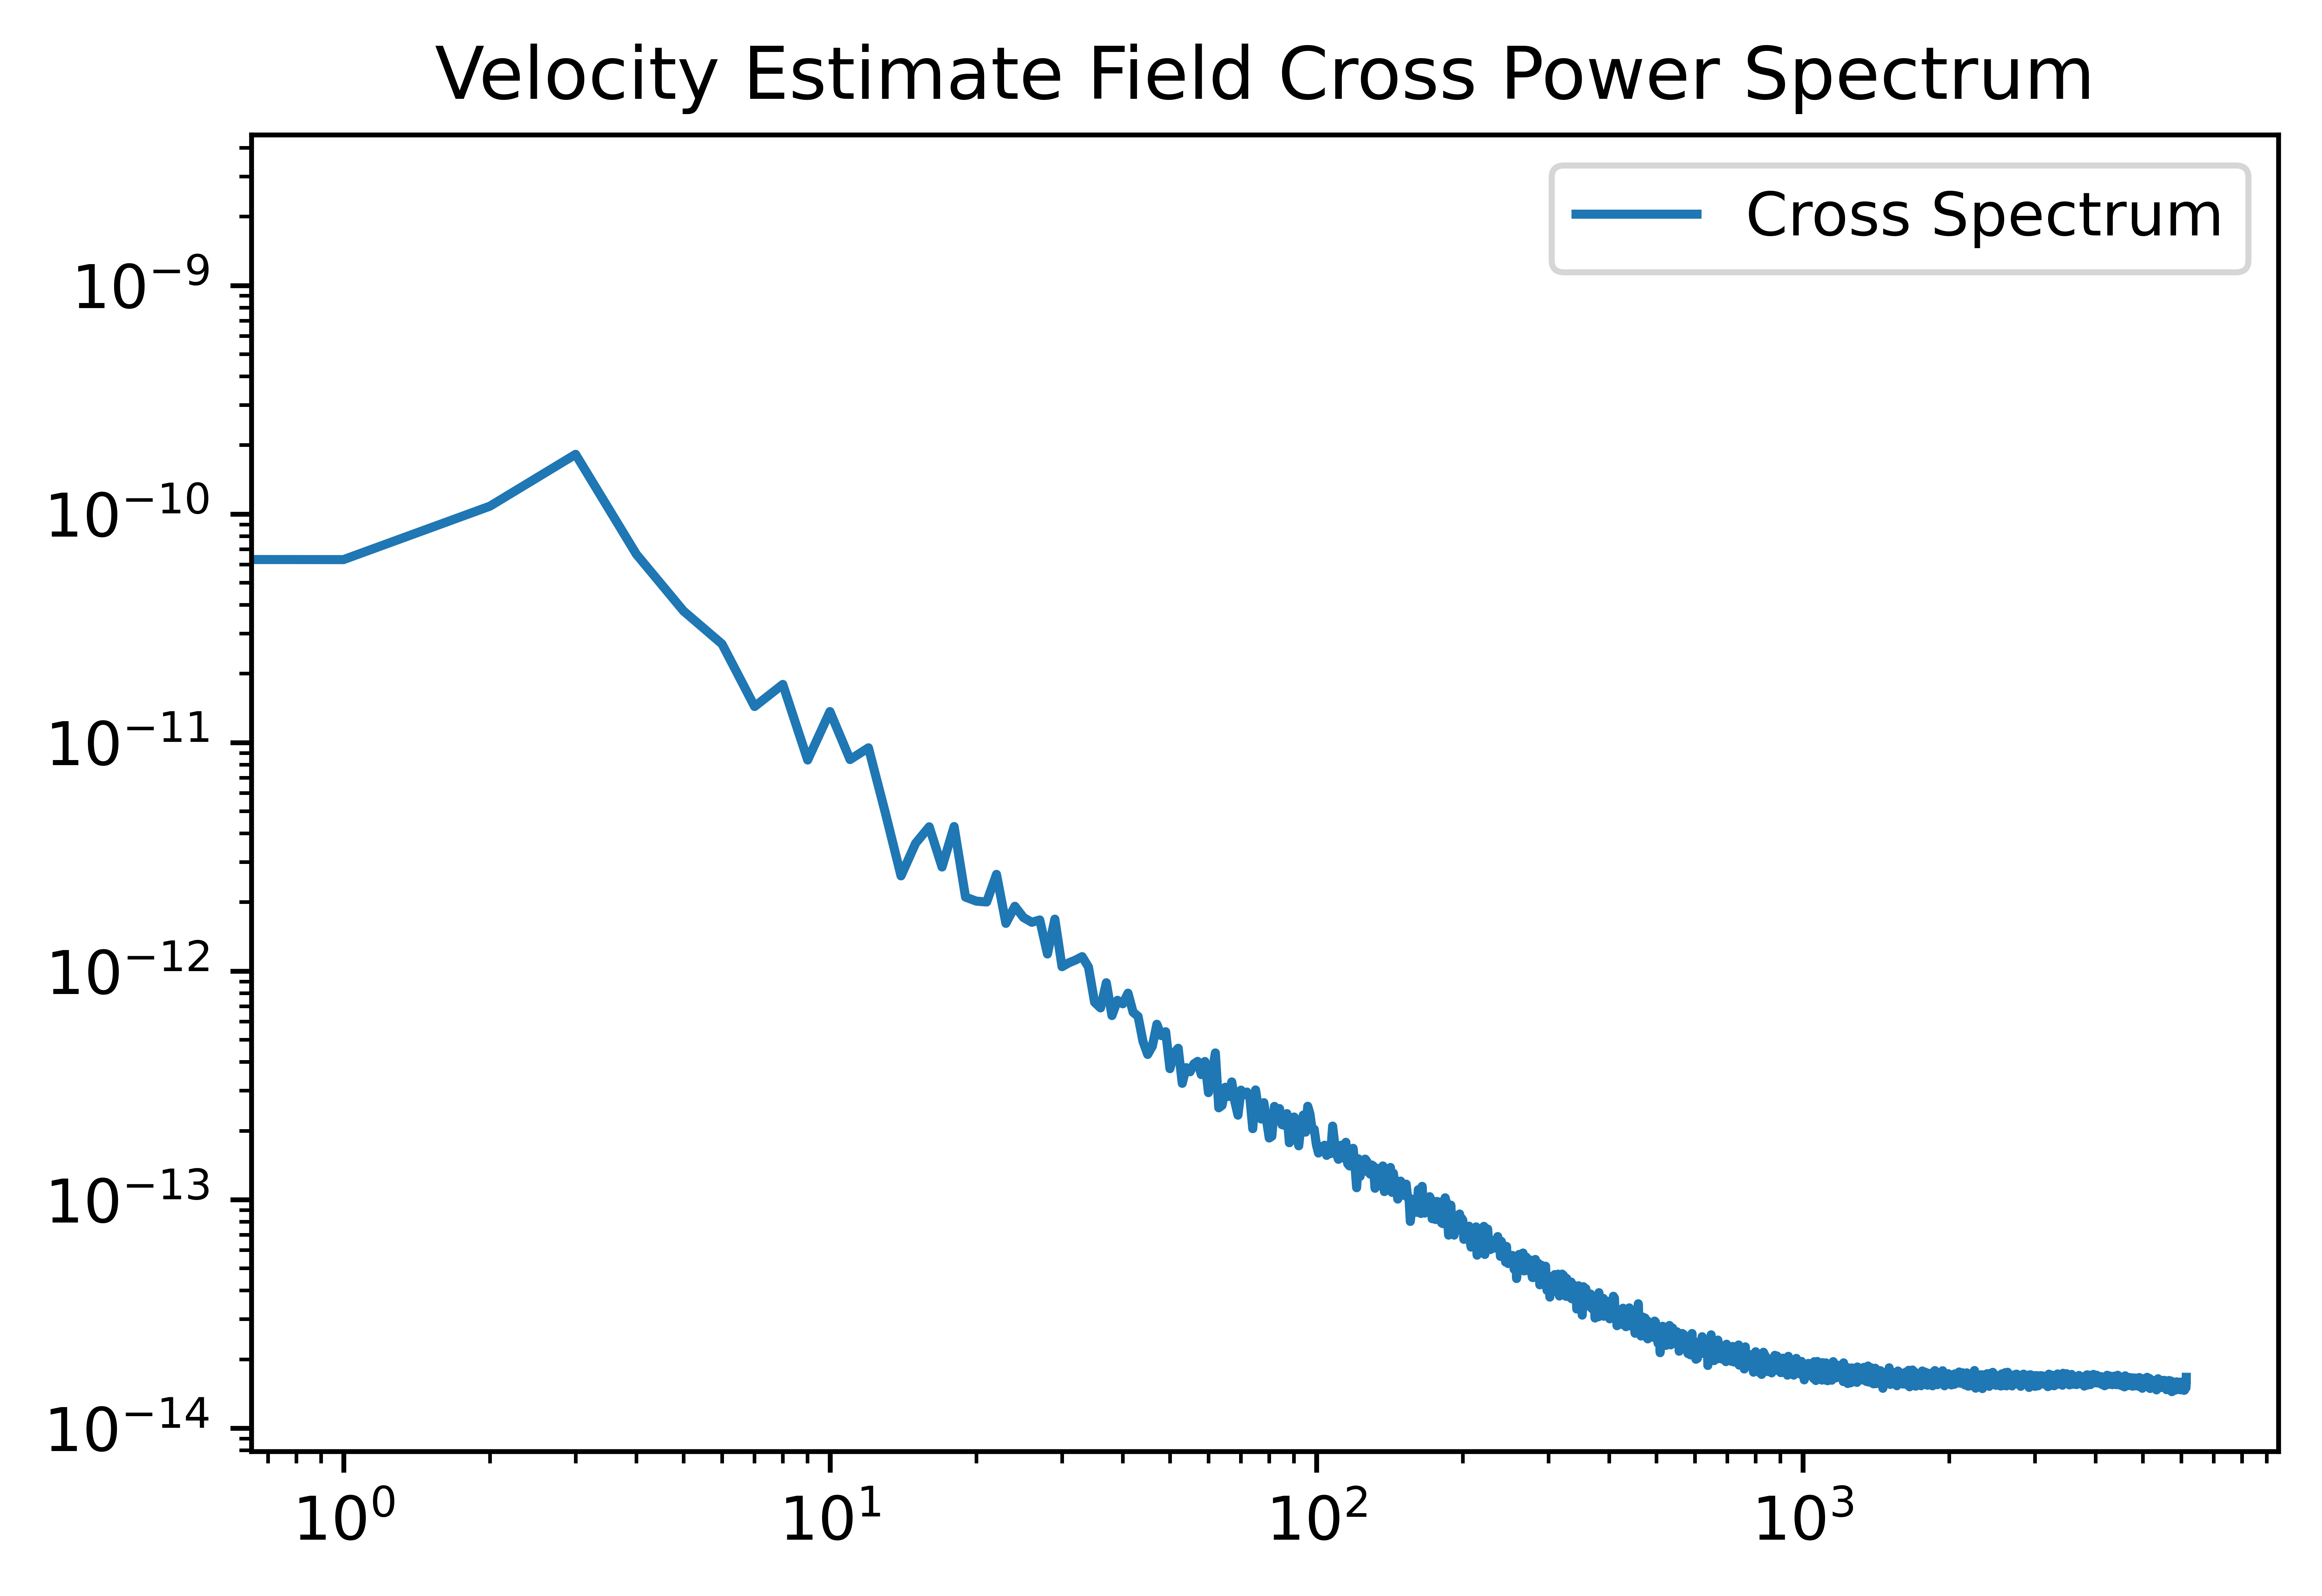

In [51]:
plt.figure(dpi=1200)
plt.loglog(np.abs(psGuessCrossActual))
plt.legend(loc=0, labels=["Cross Spectrum"])
plt.title("Velocity Estimate Field Cross Power Spectrum")
plt.show()

In [52]:
correlationVelEst = psGuessCrossActual/np.sqrt(psVel*psVelEst)

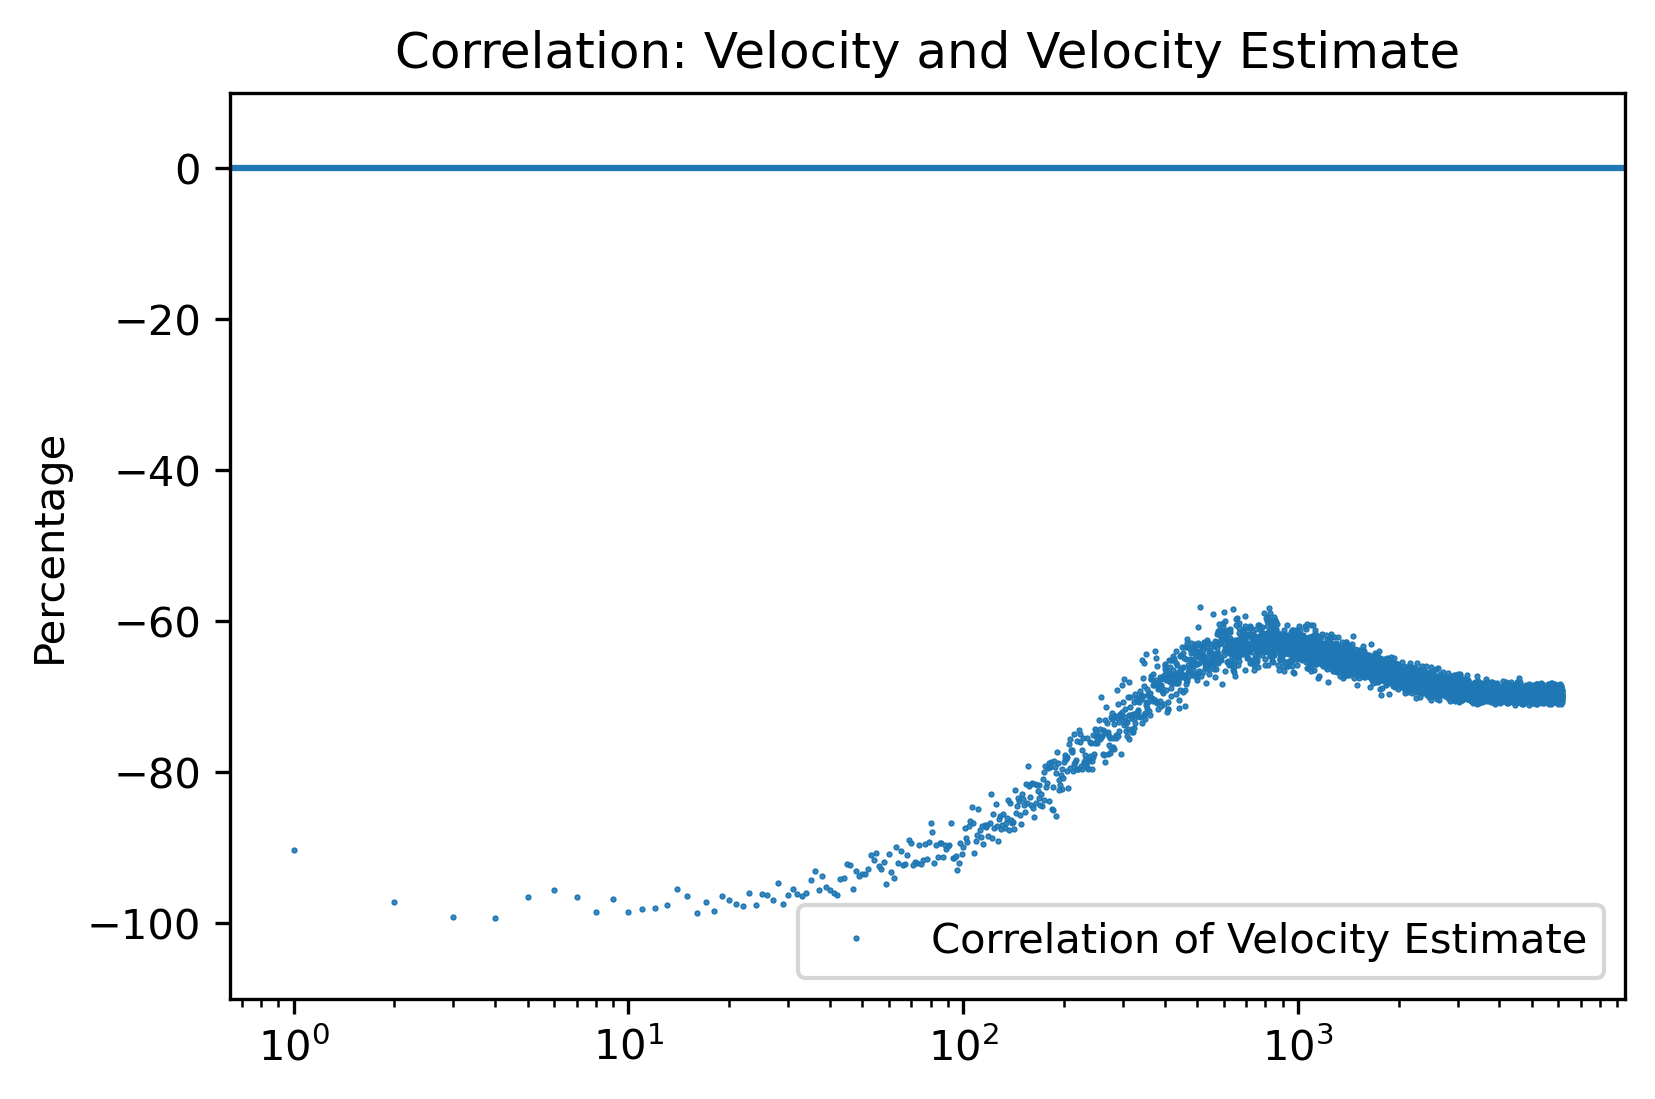

In [53]:
plt.figure(dpi=300)
plt.plot(correlationVelEst*100,".",markersize=1);
plt.legend(loc=0, labels=["Correlation of Velocity Estimate"])
plt.title("Correlation: Velocity and Velocity Estimate")
plt.ylabel("Percentage")
plt.semilogx()
plt.axhline(0)
plt.ylim(-110,10)
plt.show()